<a href="https://colab.research.google.com/github/outalbamine/M_DLearning/blob/main/business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
data=pd.read_excel('data.xlsx',sheet_name='data')

In [2]:
data.head()

,id,sub_ms_class,zoning_ms,frontge_lot,area_lot,streetname,alleyname,shape_lot,contour_land,util,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,128,45,RM,55.0,4388,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,87000
1,456,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,175500
2,1324,30,RL,50.0,5330,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,82500
3,218,70,RM,57.0,9906,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Family,107000
4,1182,120,RM,64.0,5587,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,392500


In [3]:
data.shape

(1460, 81)

In [4]:
data.drop_duplicates(inplace=True)

datatypes for each columns


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1460 non-null   int64  
 1   sub_ms_class      1460 non-null   int64  
 2   zoning_ms         1460 non-null   object 
 3   frontge_lot       1201 non-null   float64
 4   area_lot          1460 non-null   int64  
 5   streetname        1460 non-null   object 
 6   alleyname         91 non-null     object 
 7   shape_lot         1460 non-null   object 
 8   contour_land      1460 non-null   object 
 9   util              1460 non-null   object 
 10  configlot         1460 non-null   object 
 11  slopeland         1460 non-null   object 
 12  neighborhood      1460 non-null   object 
 13  c1                1460 non-null   object 
 14  c2                1460 non-null   object 
 15  type_building     1460 non-null   object 
 16  style_house       1460 non-null   object 


In [6]:
data=data.set_index('id')

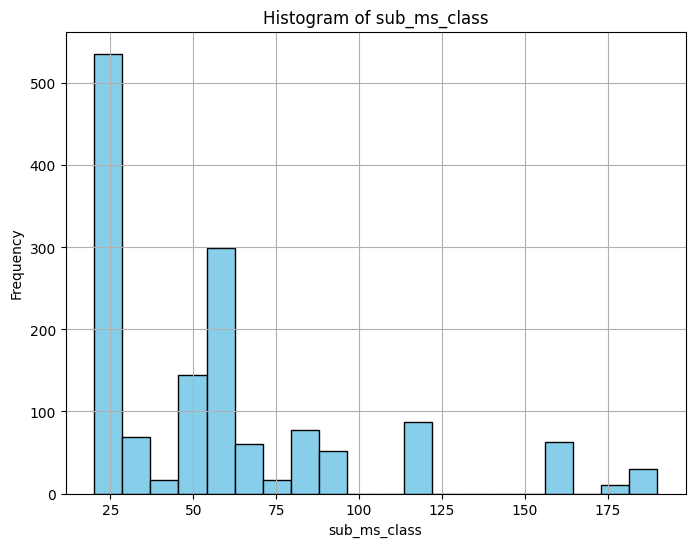

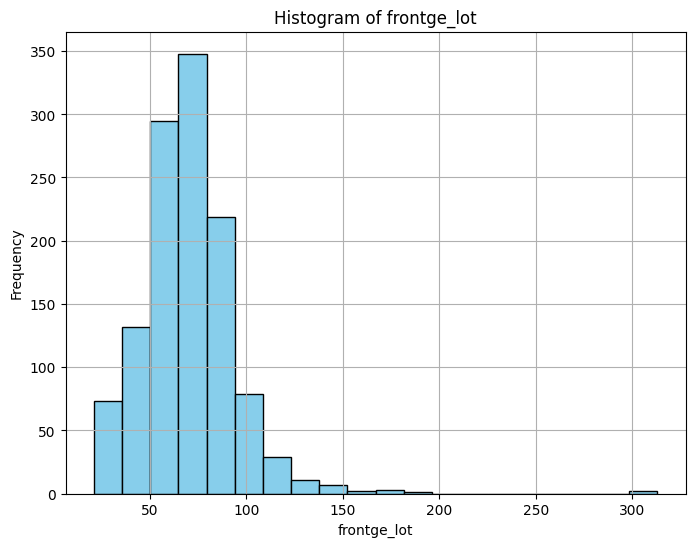

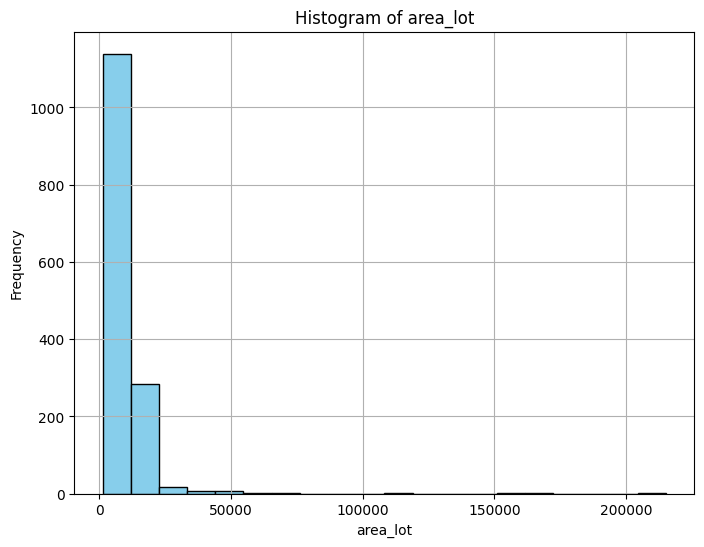

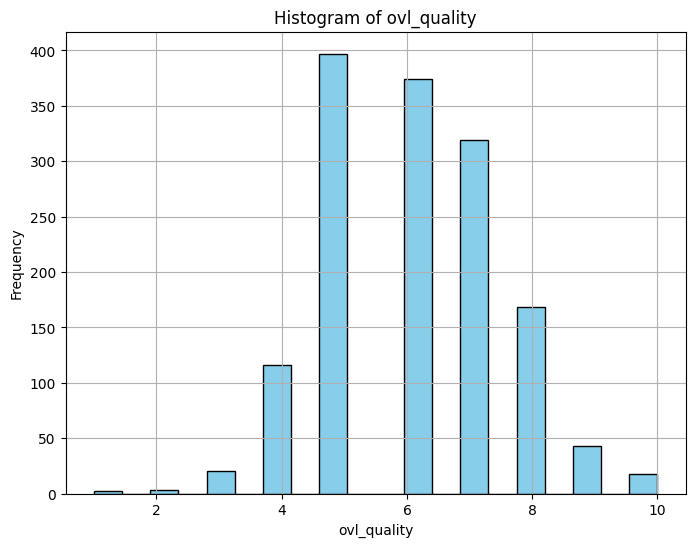

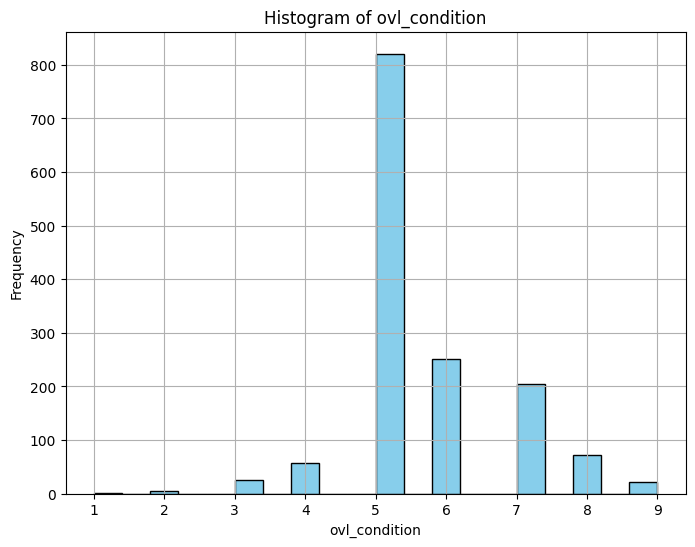

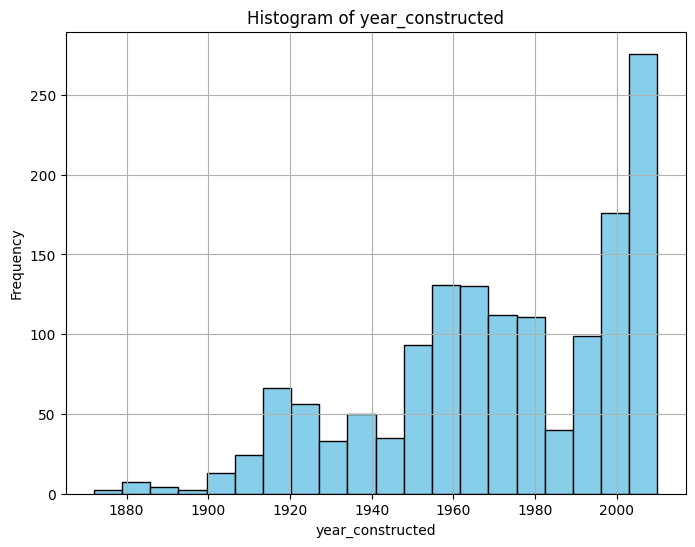

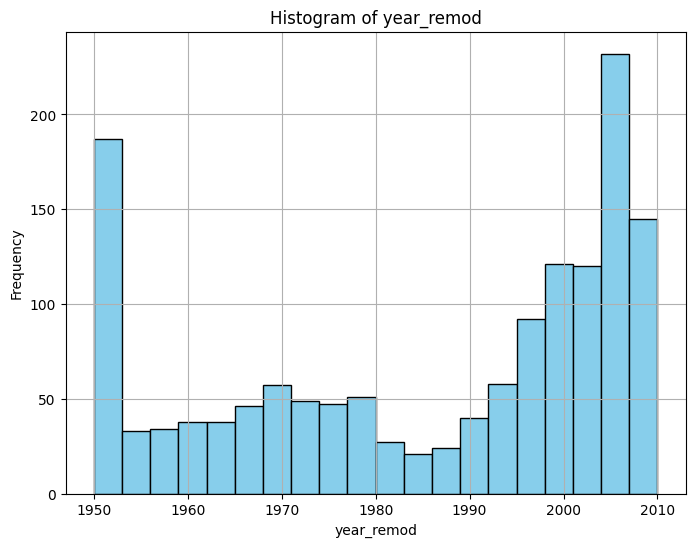

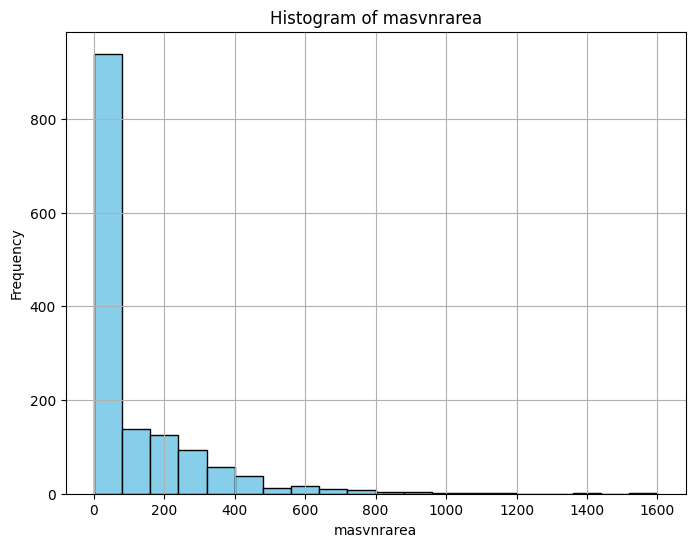

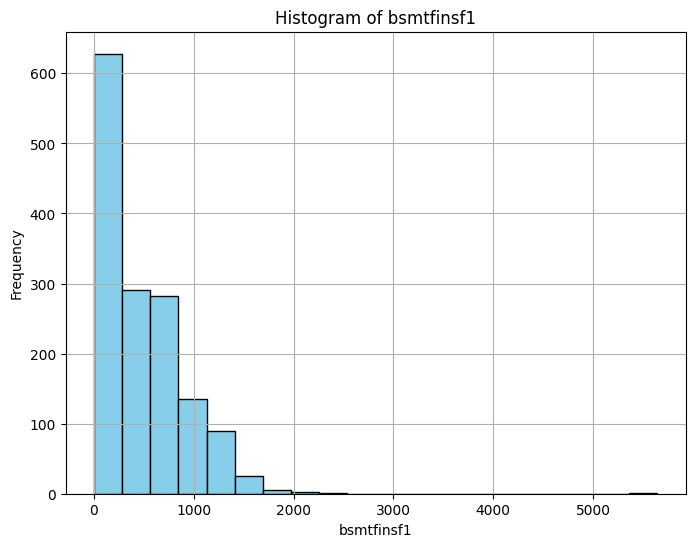

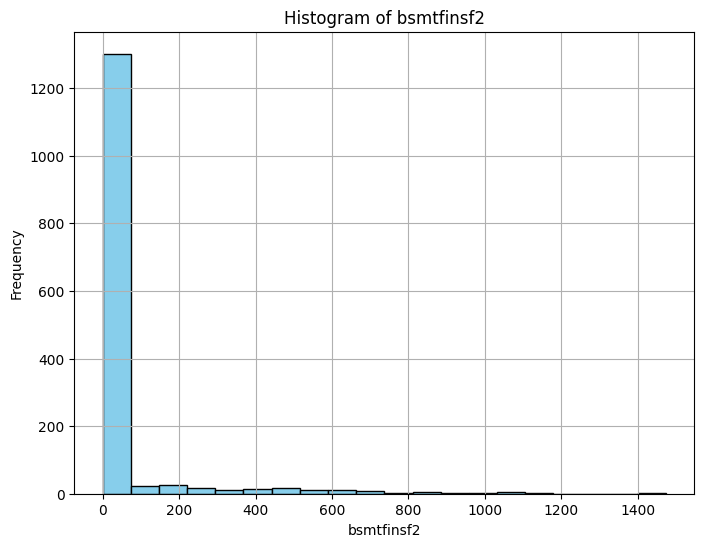

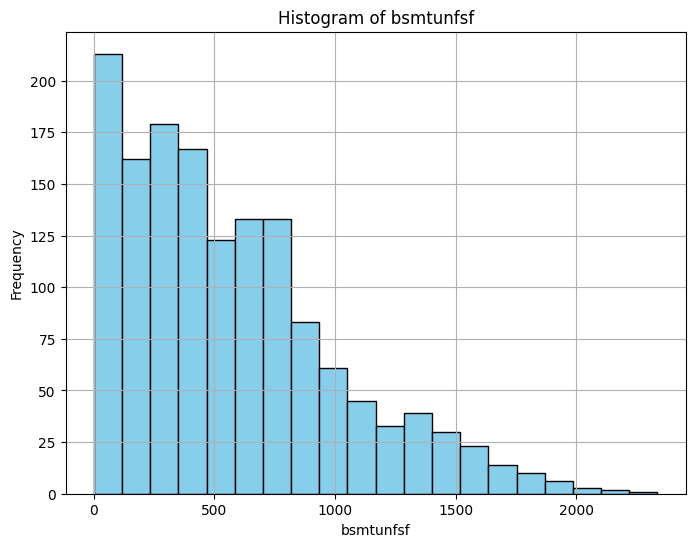

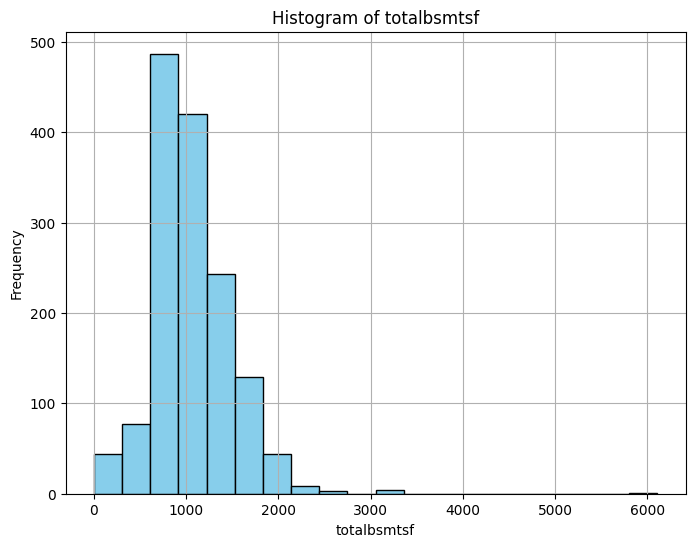

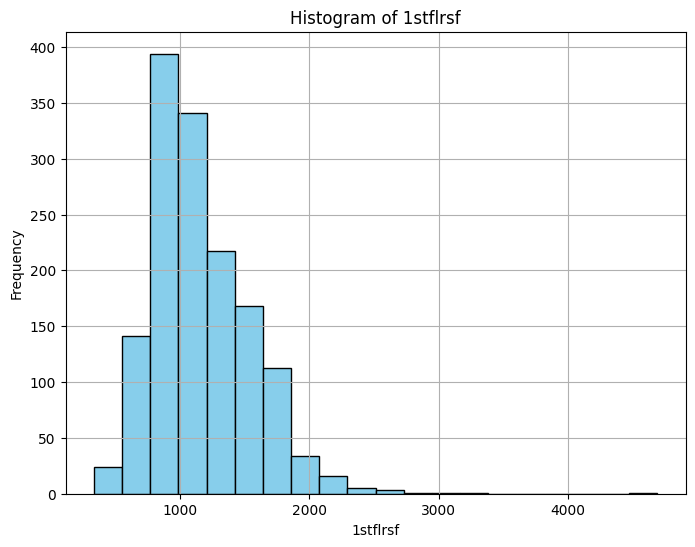

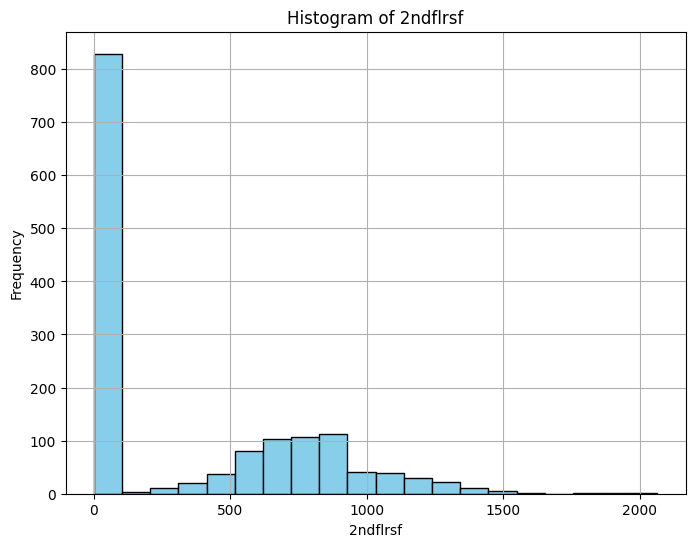

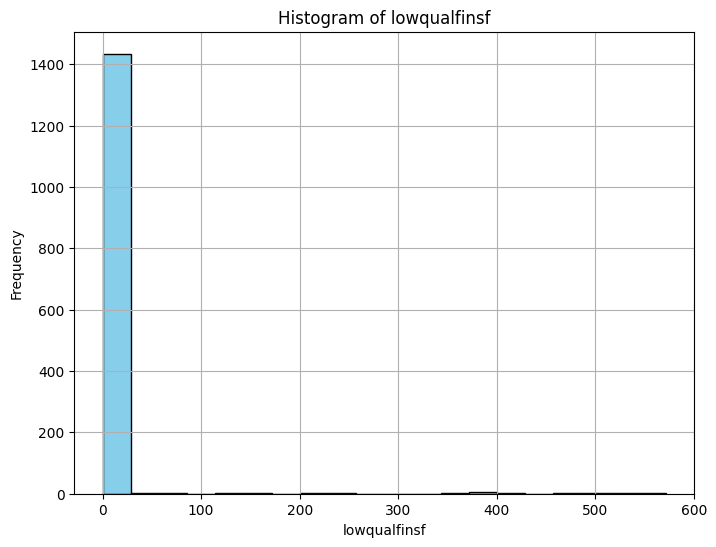

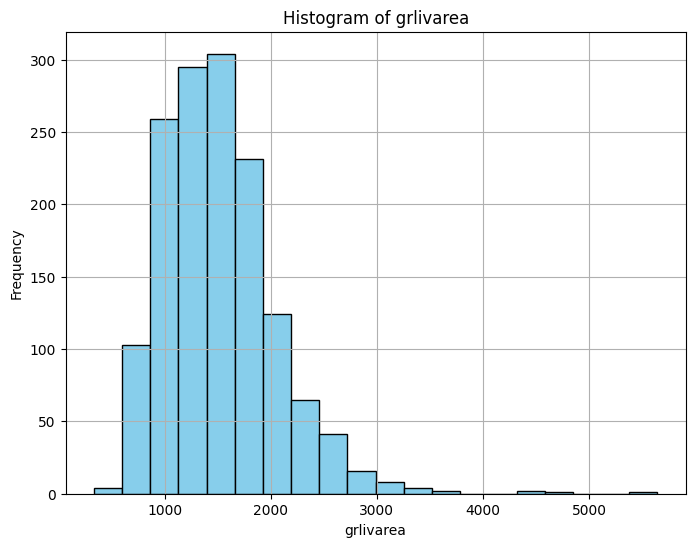

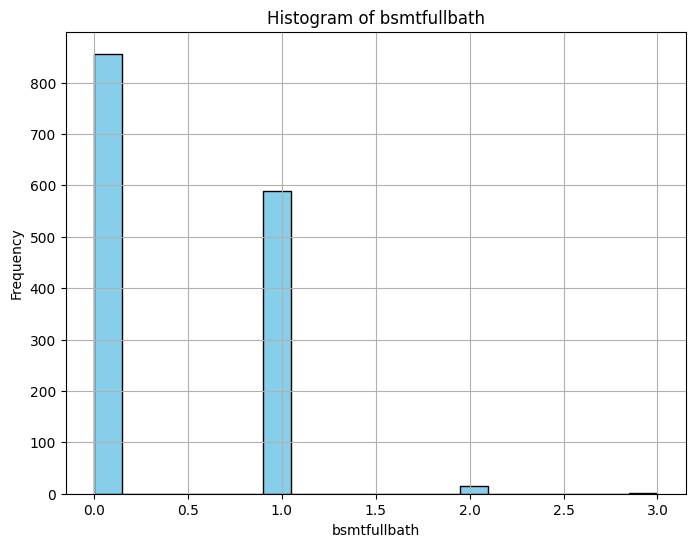

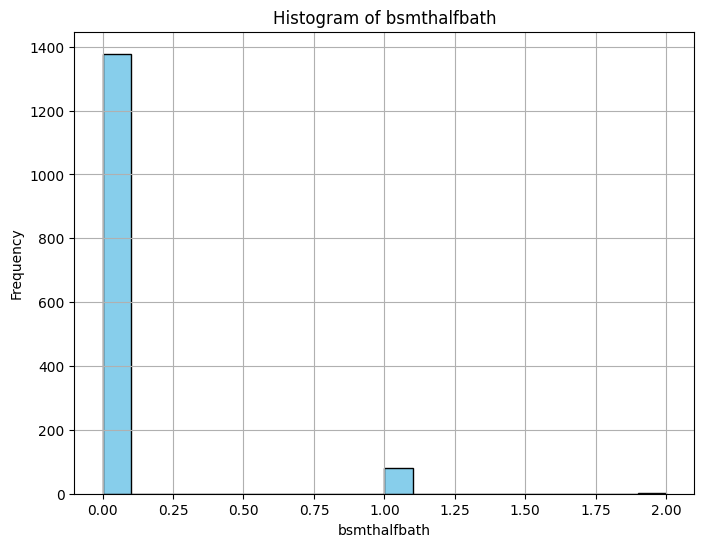

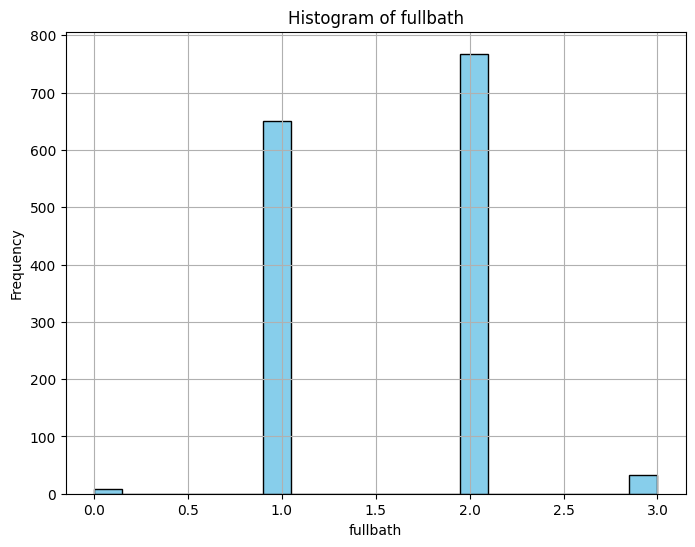

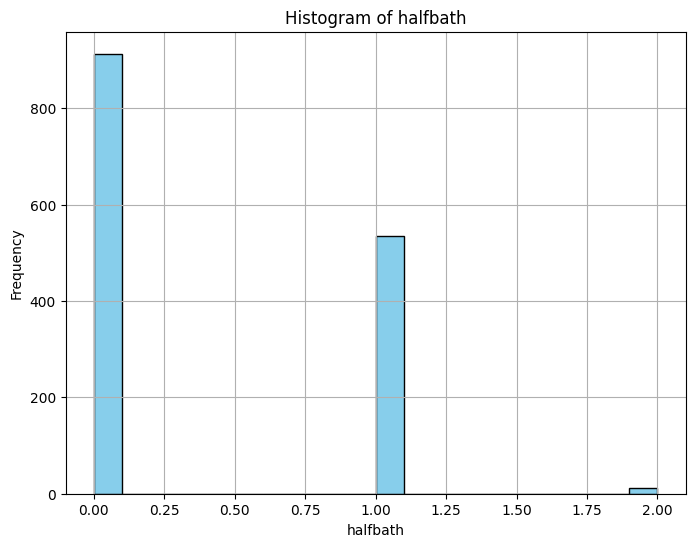

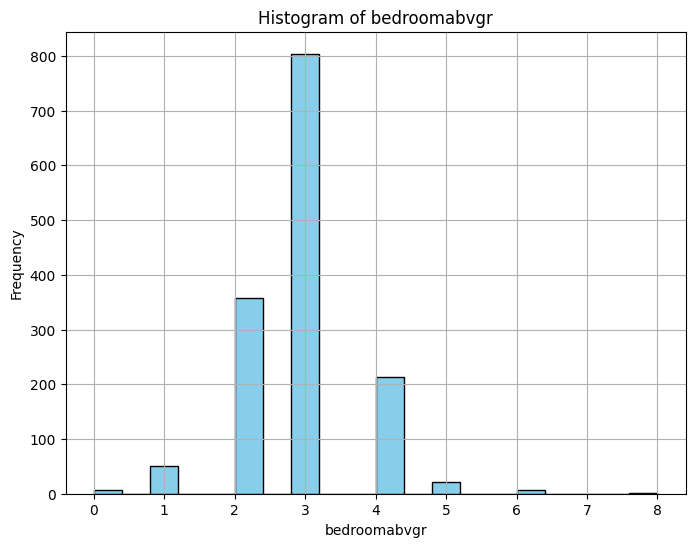

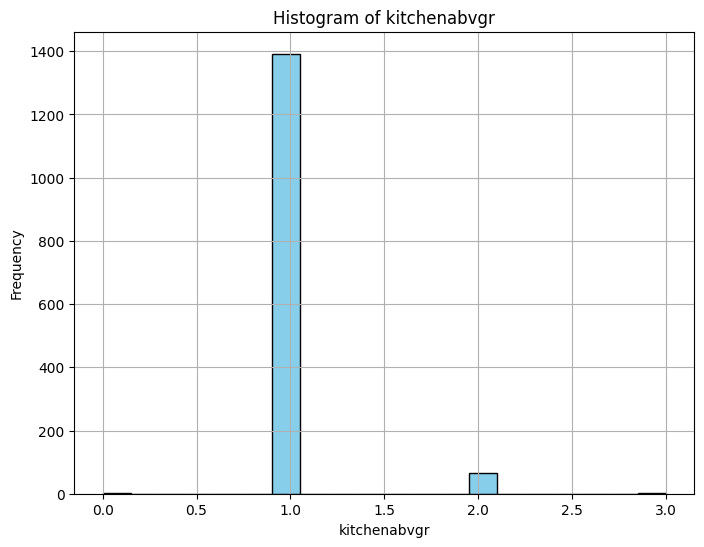

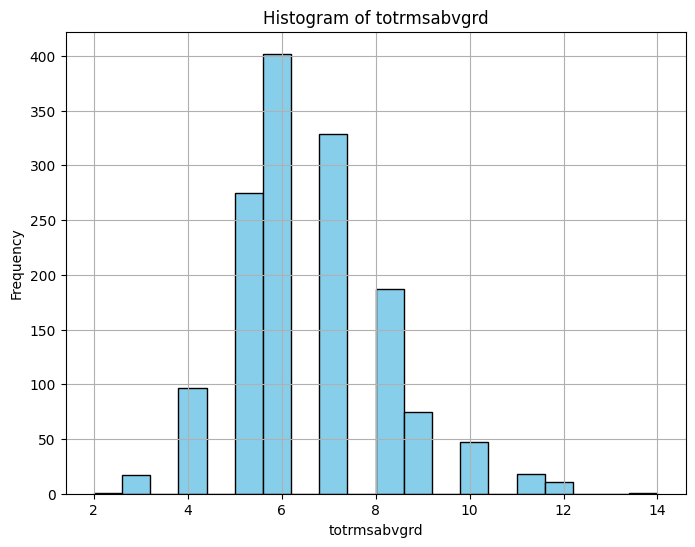

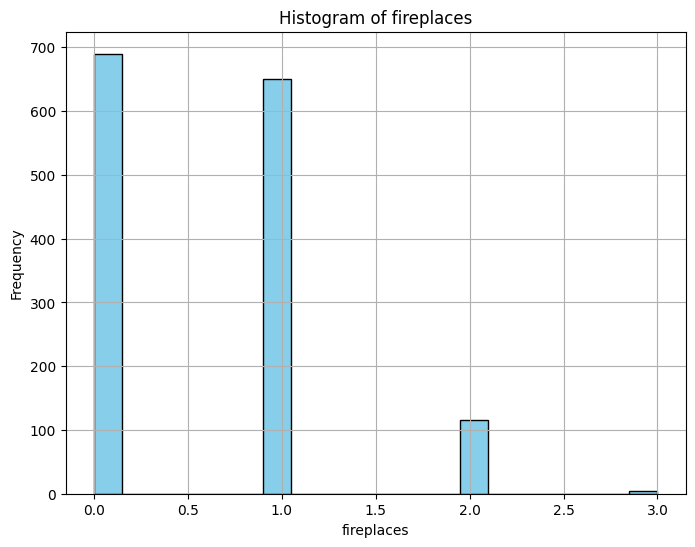

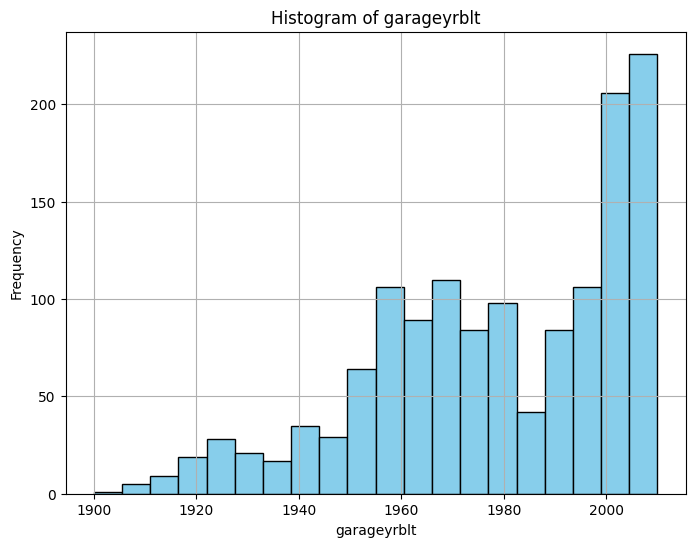

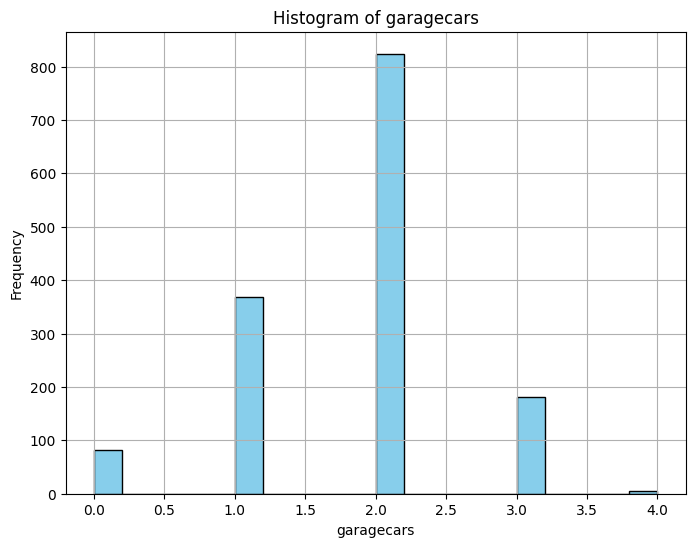

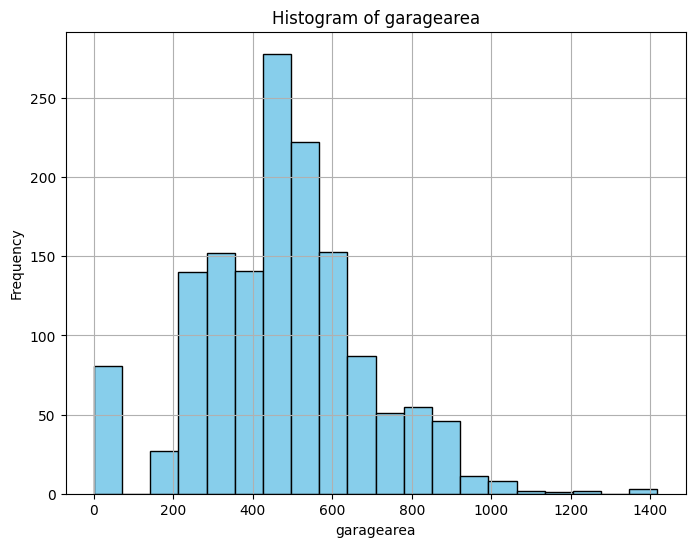

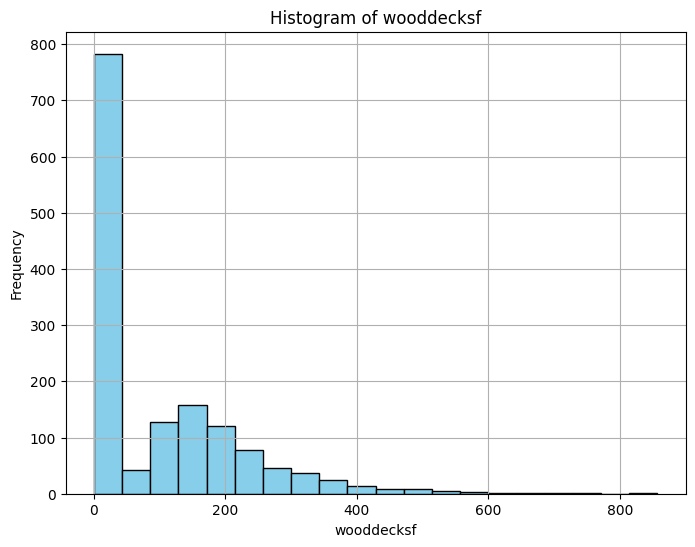

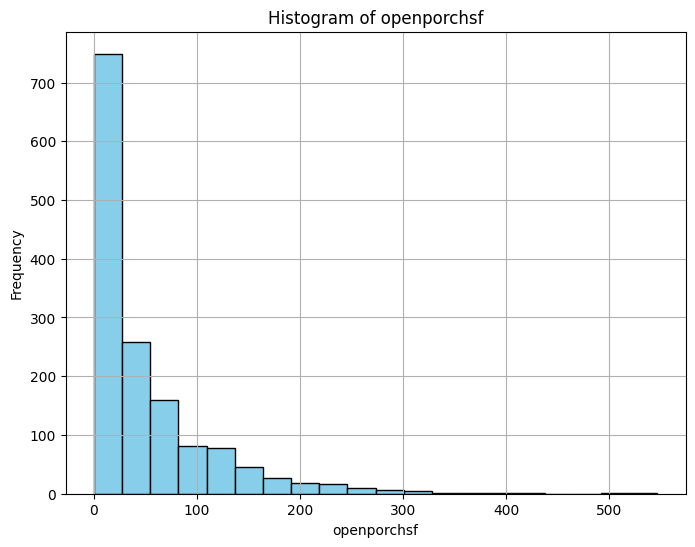

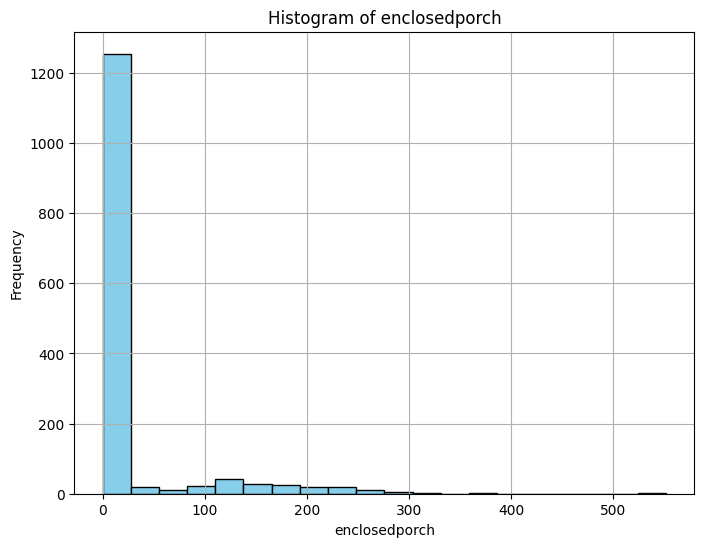

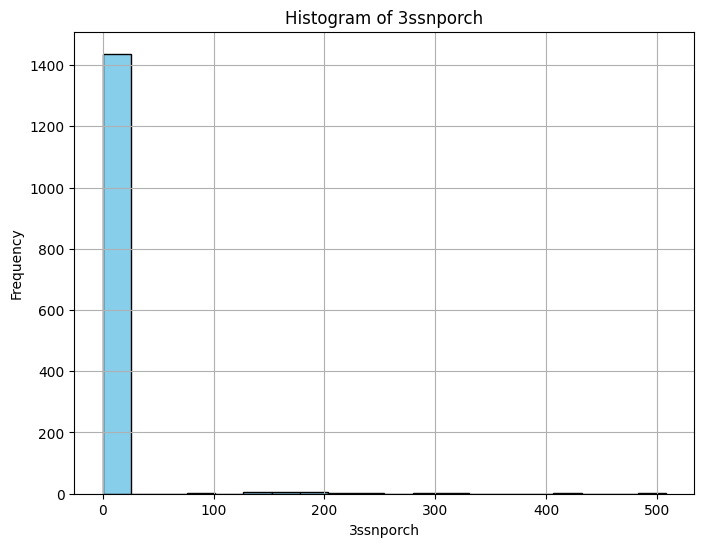

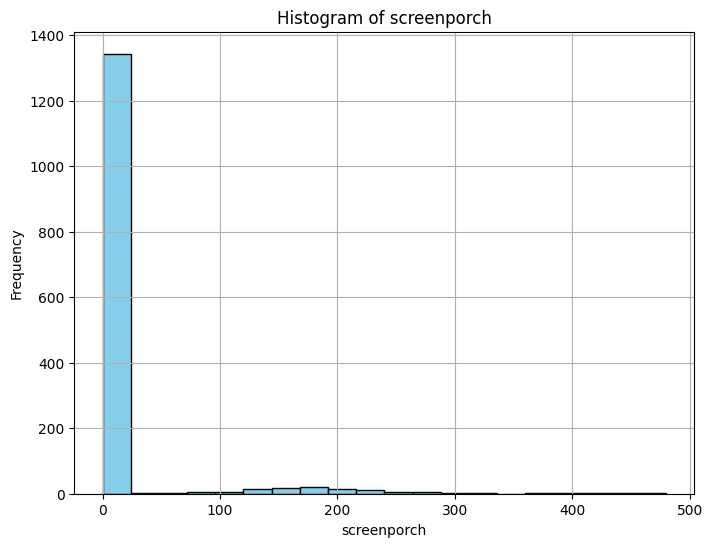

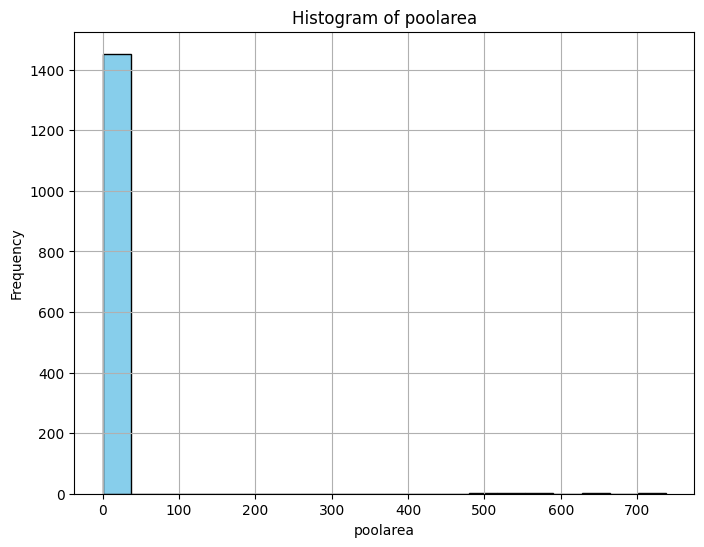

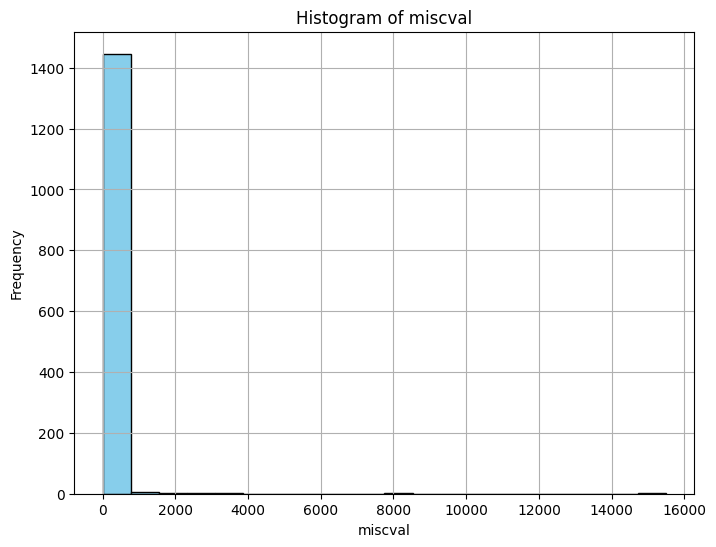

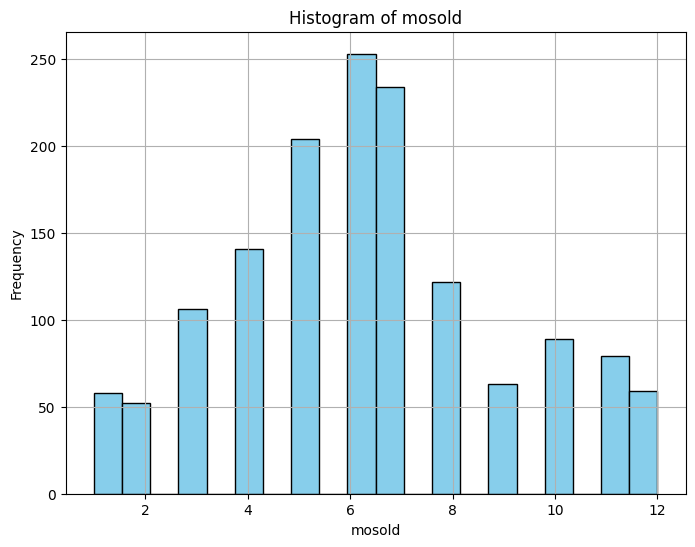

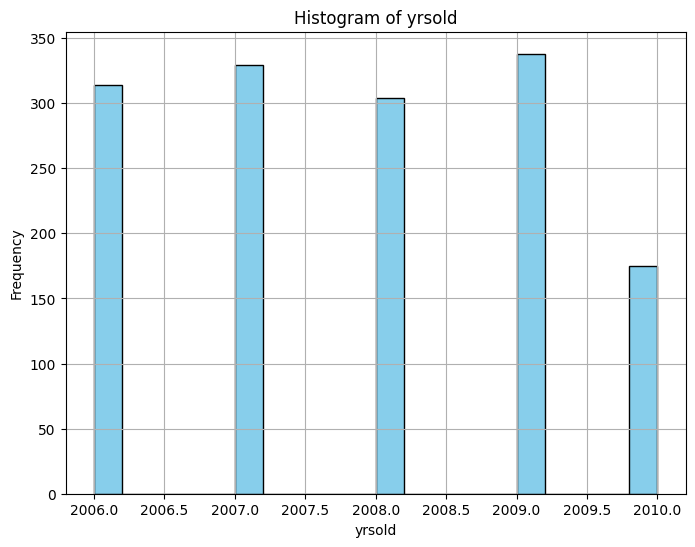

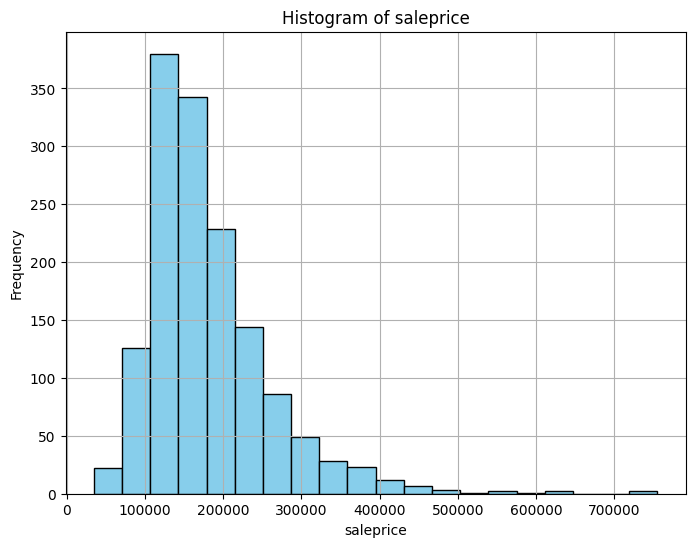

In [7]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
import matplotlib.pyplot as plt

# Plot frequency distribution histograms
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

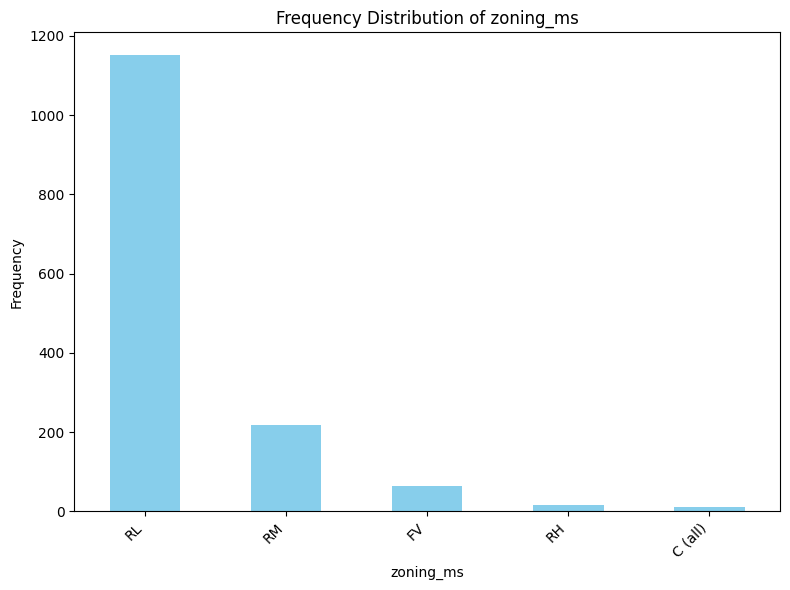

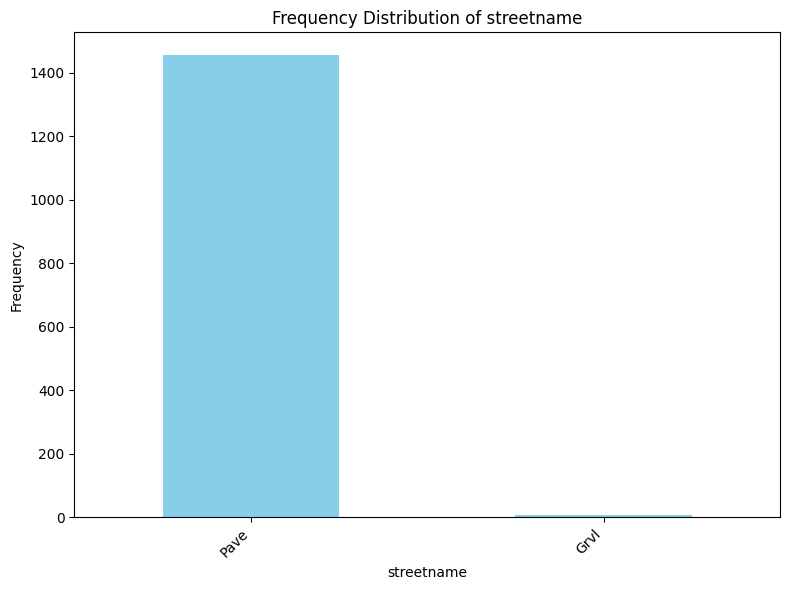

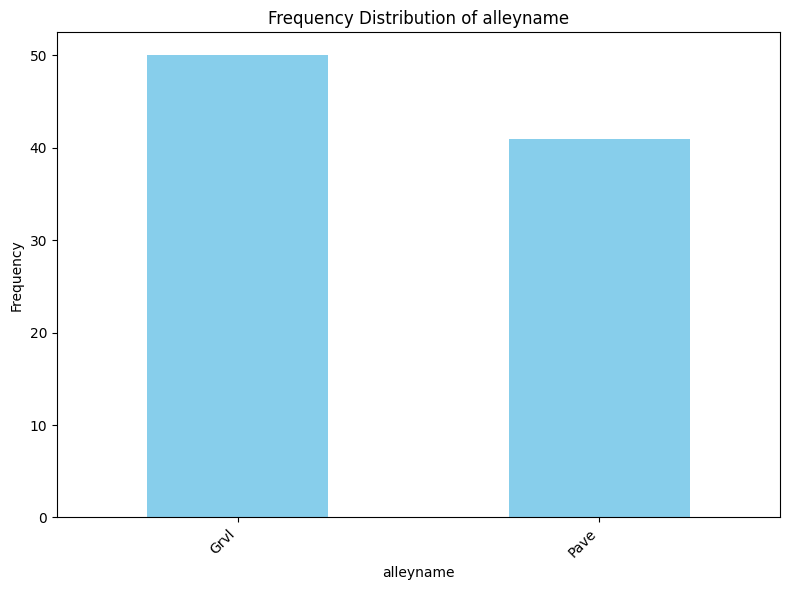

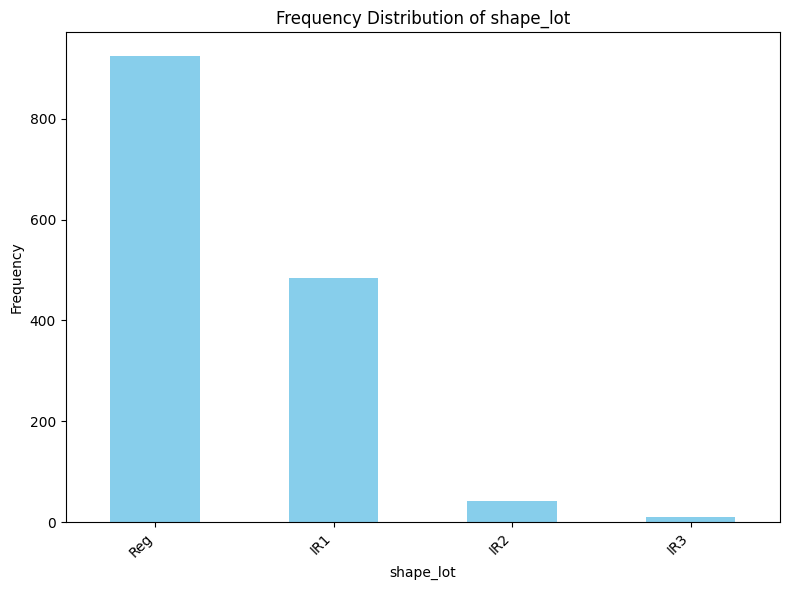

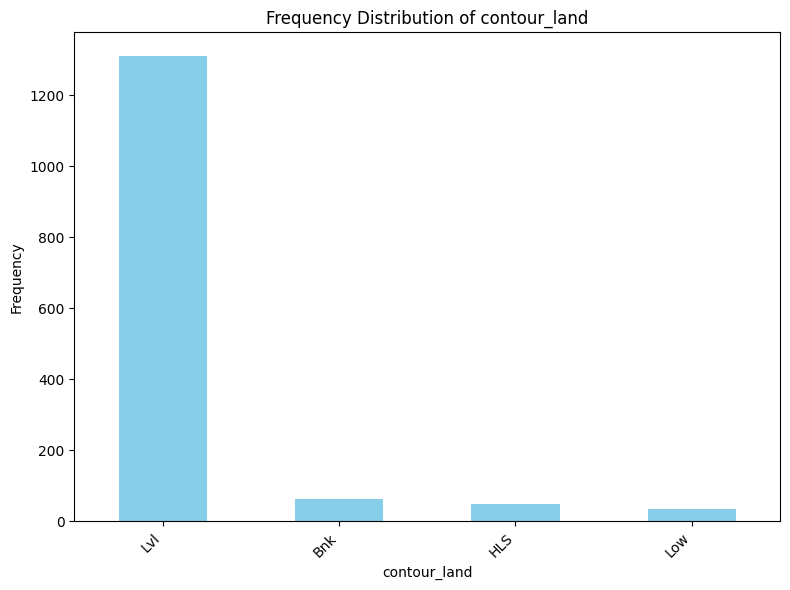

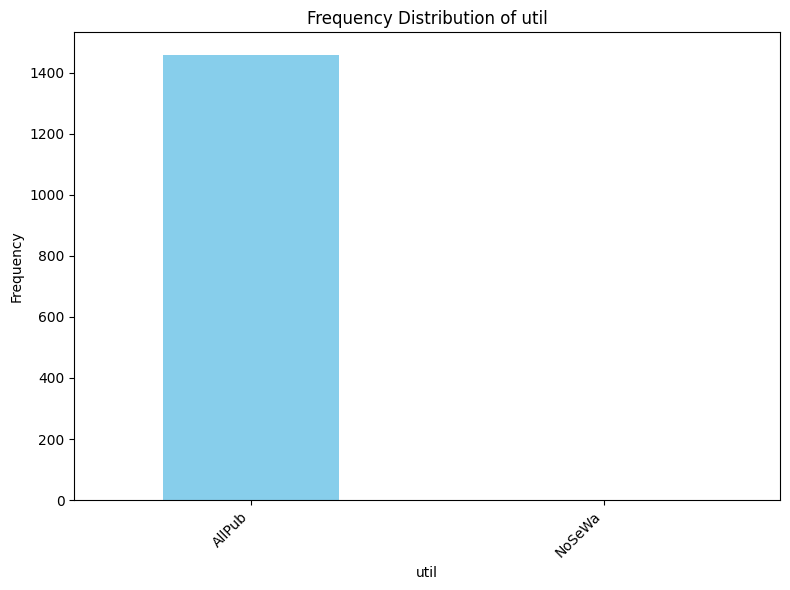

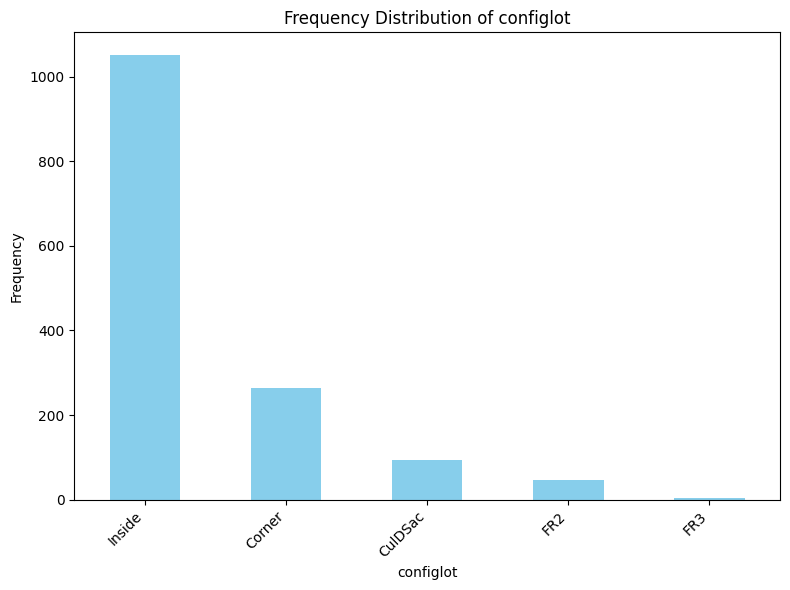

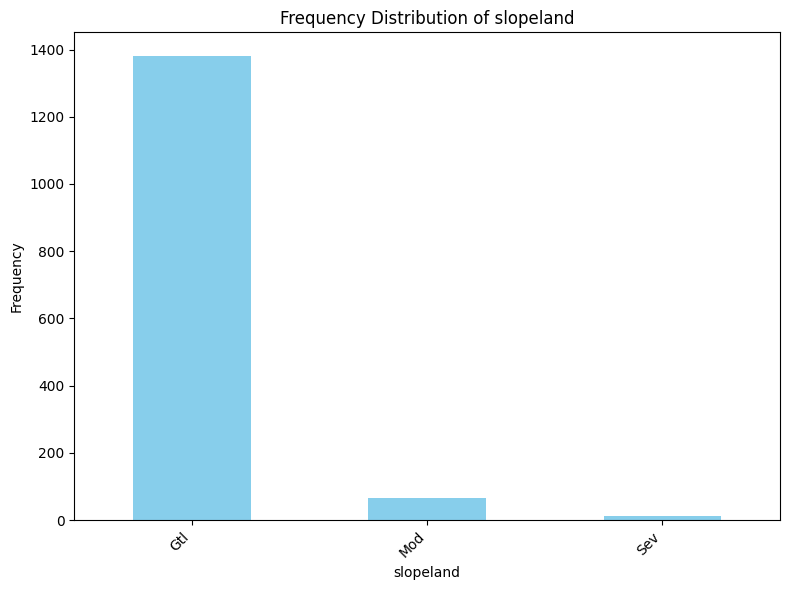

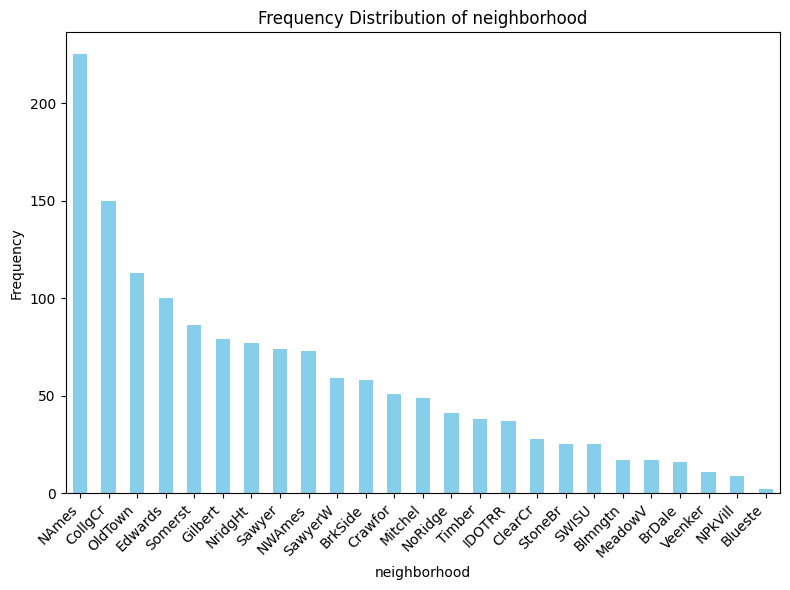

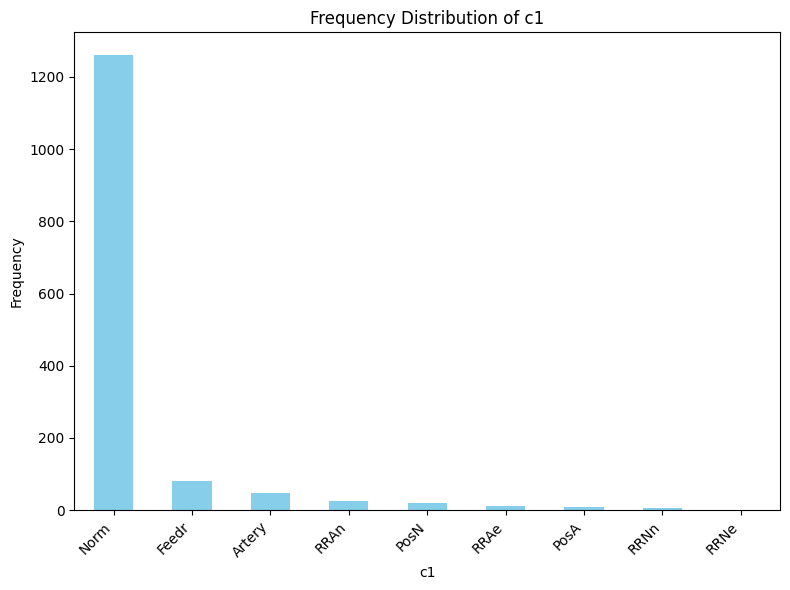

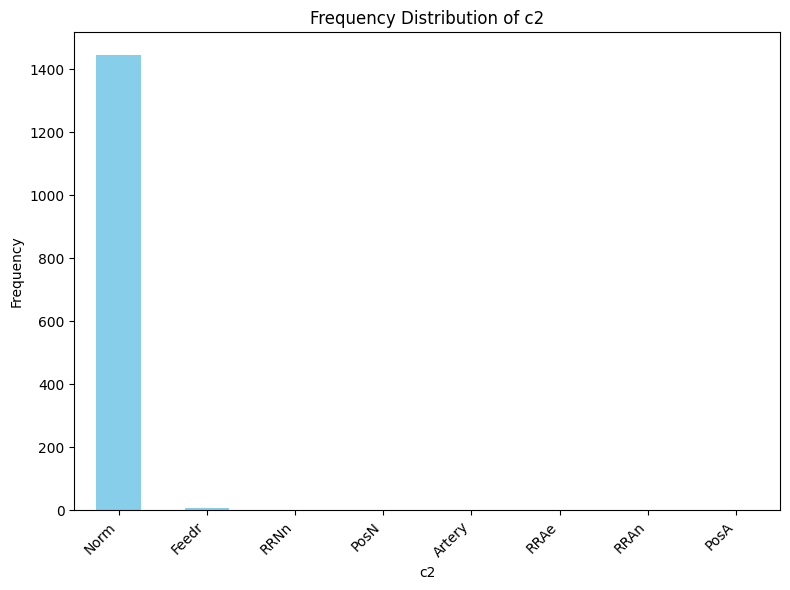

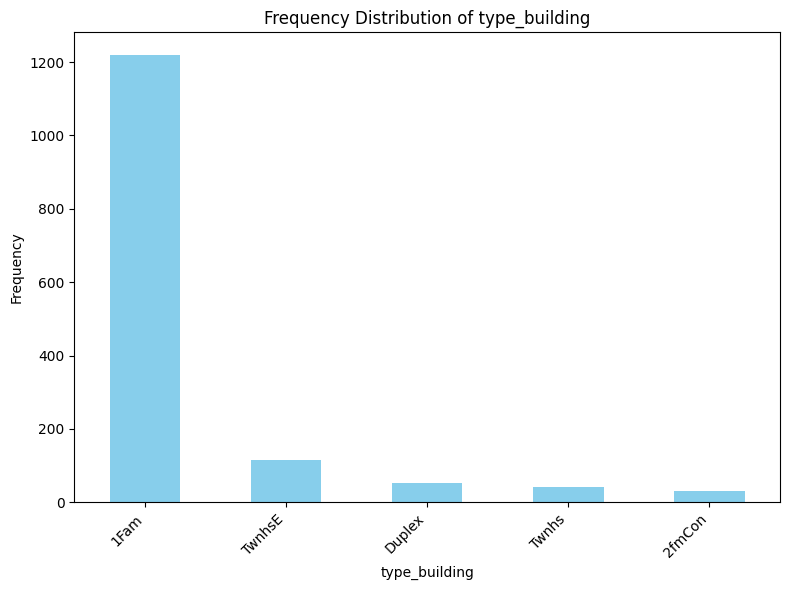

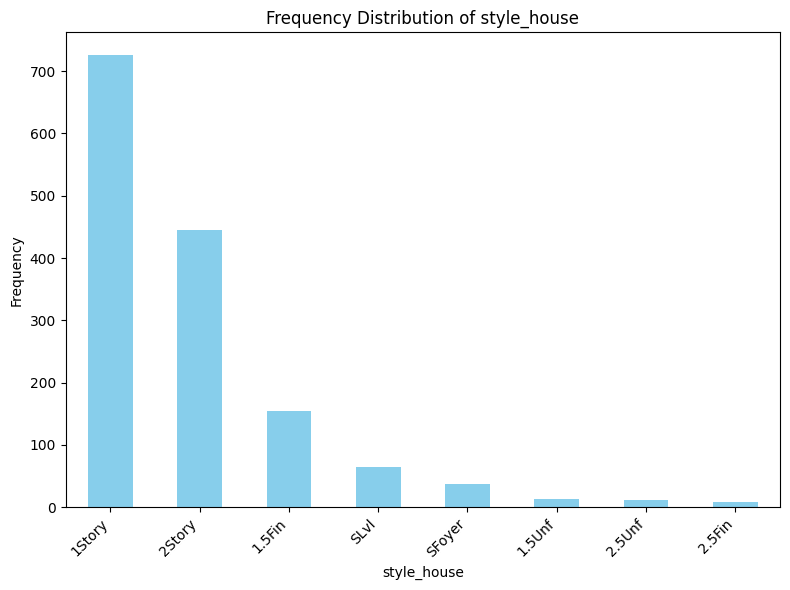

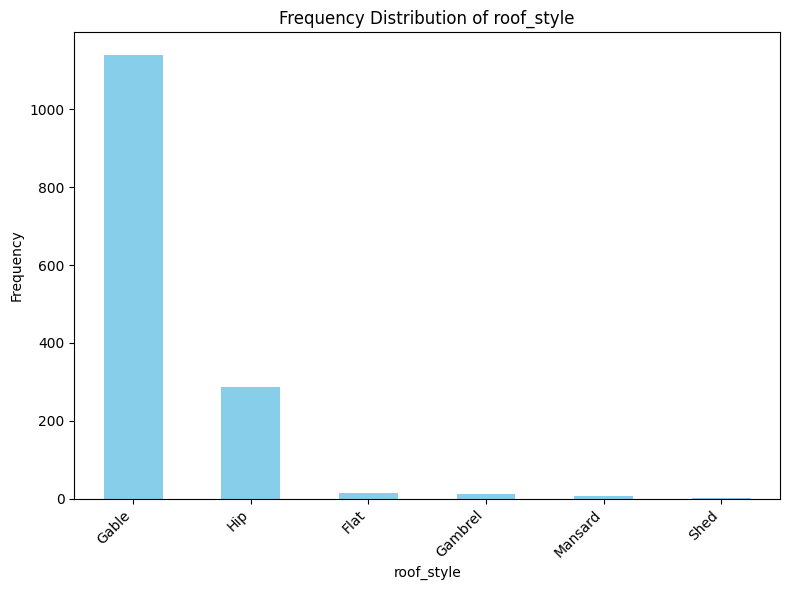

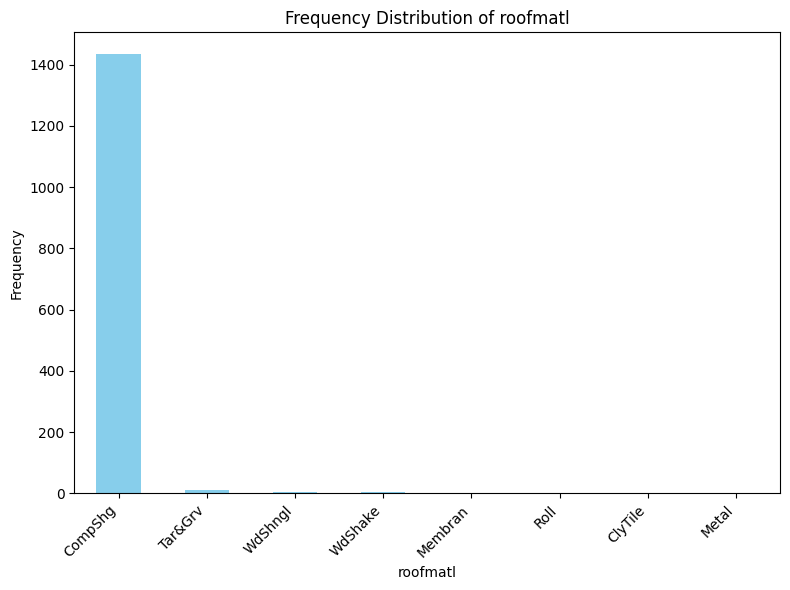

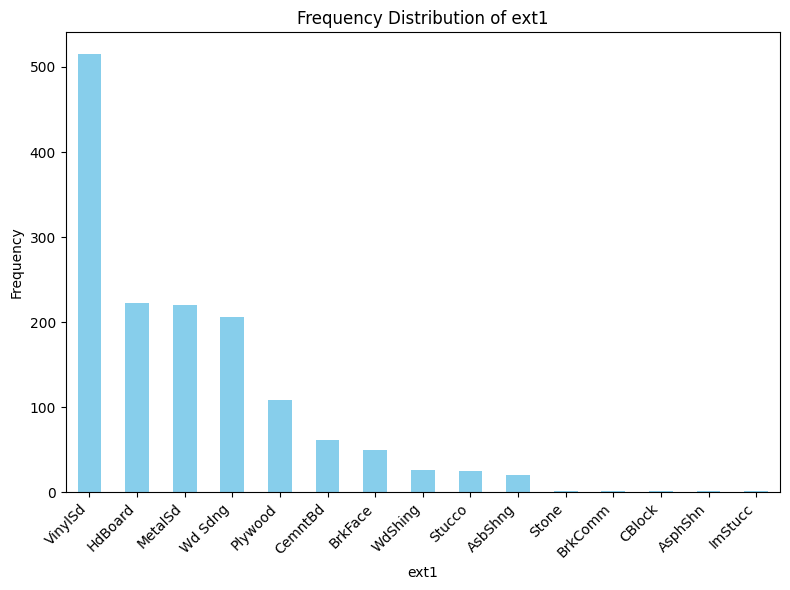

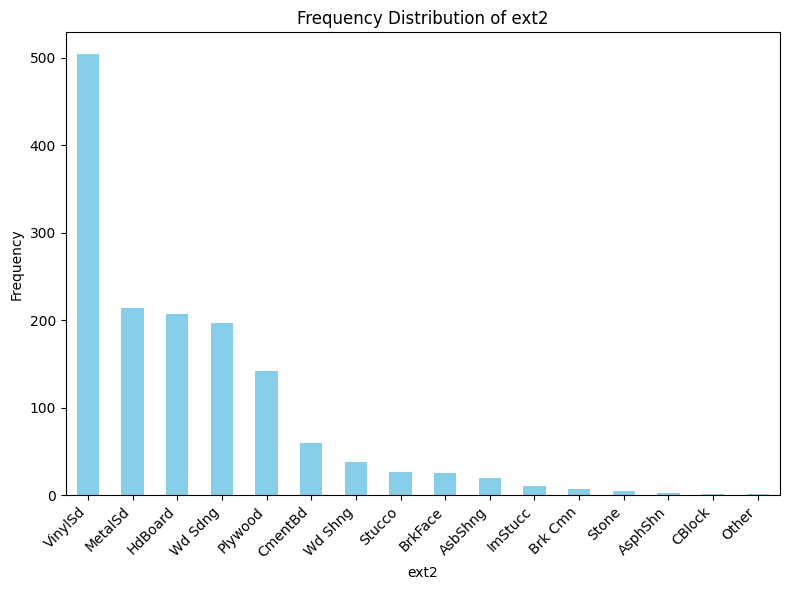

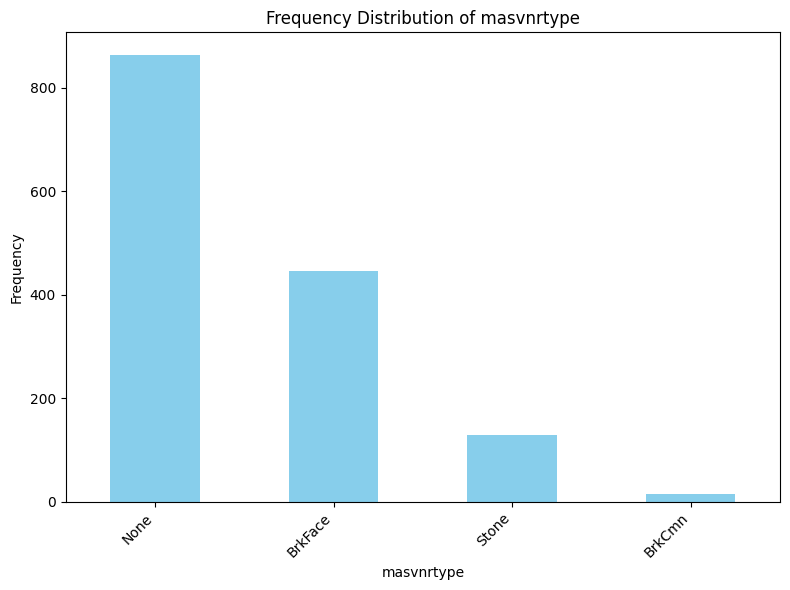

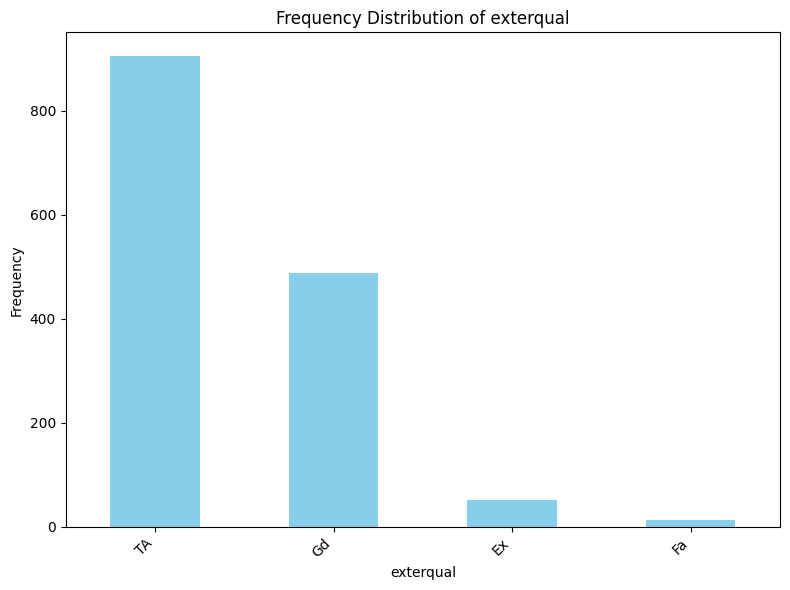

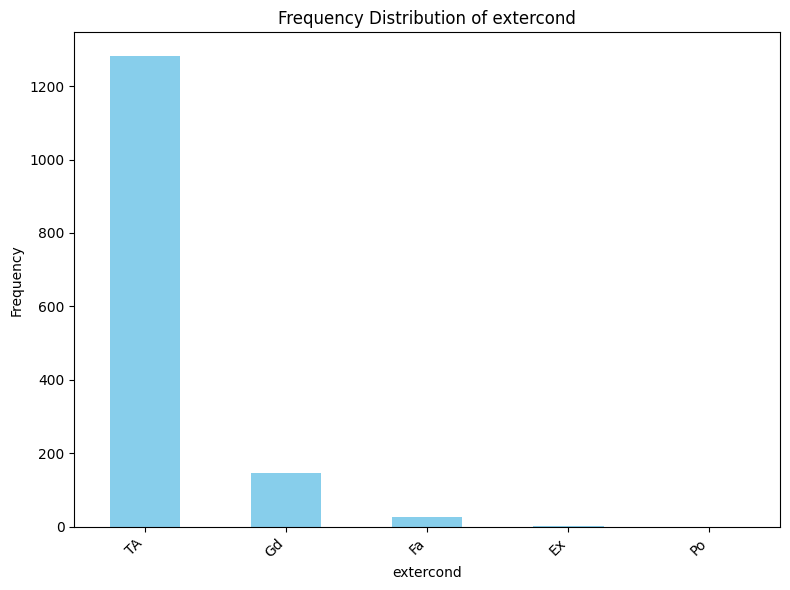

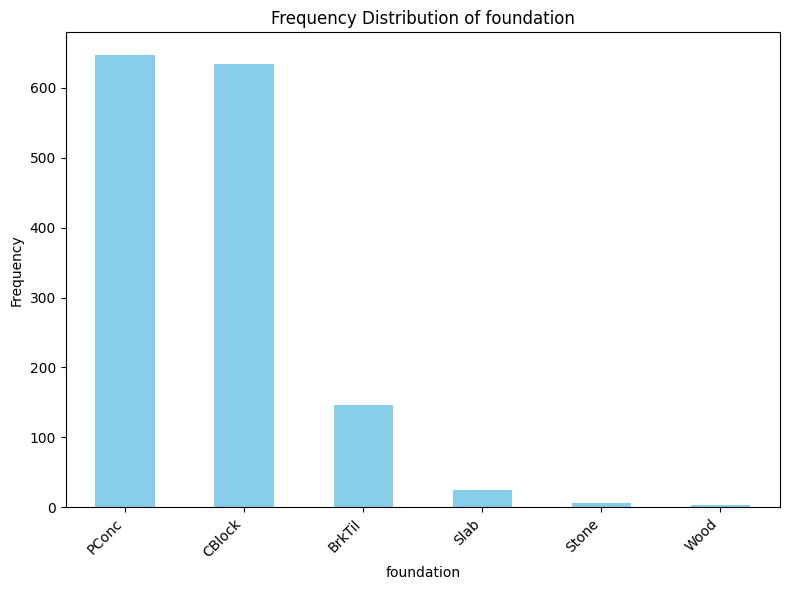

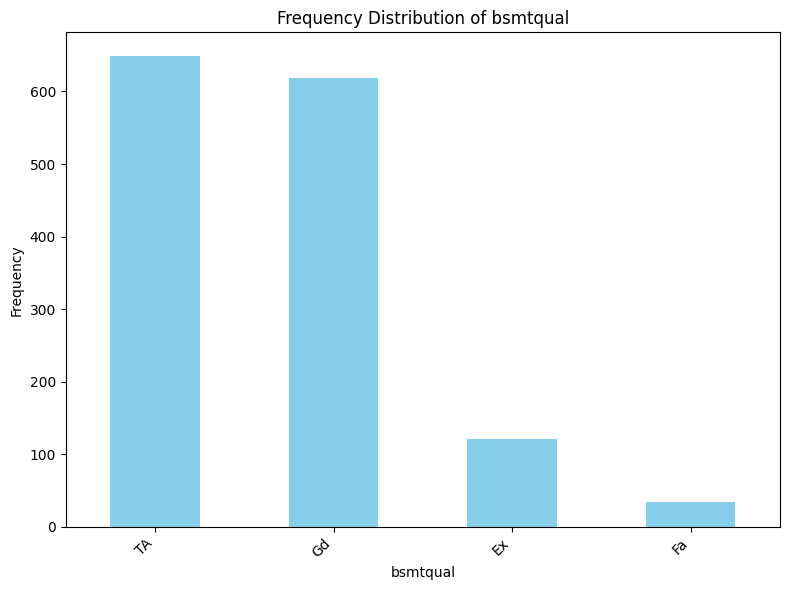

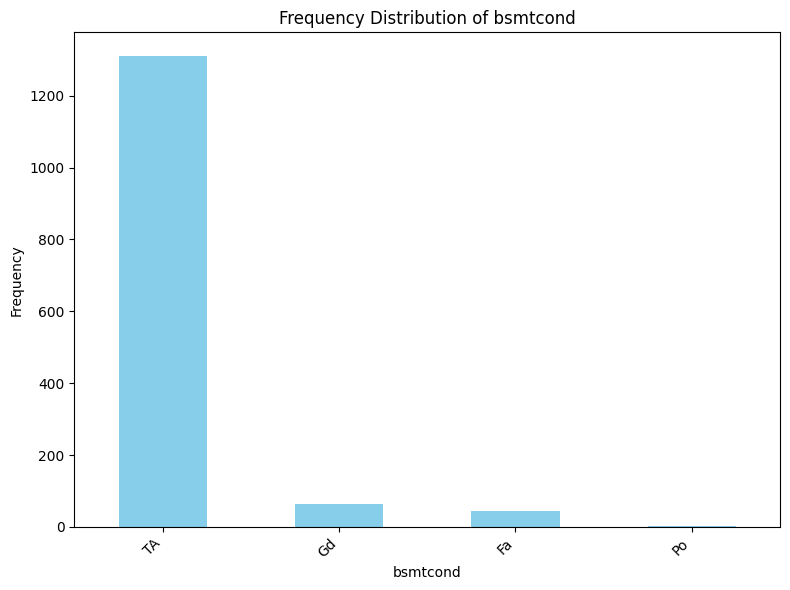

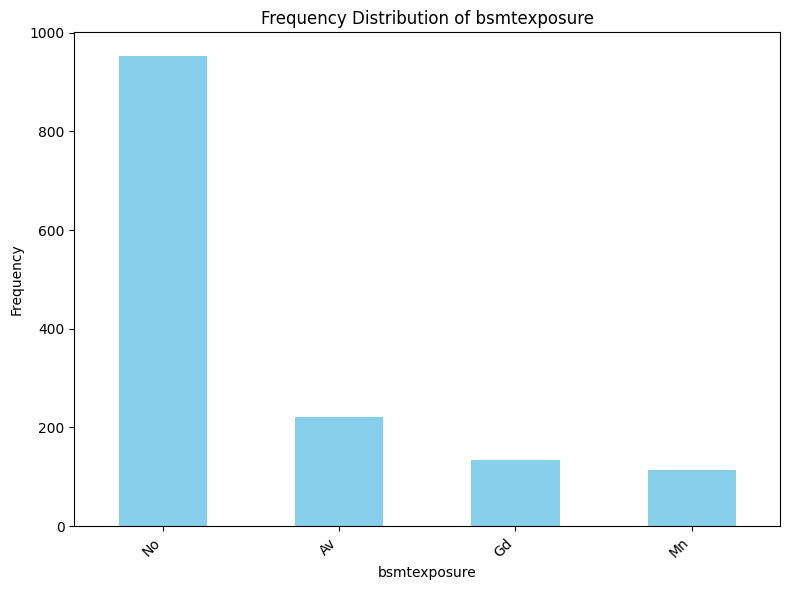

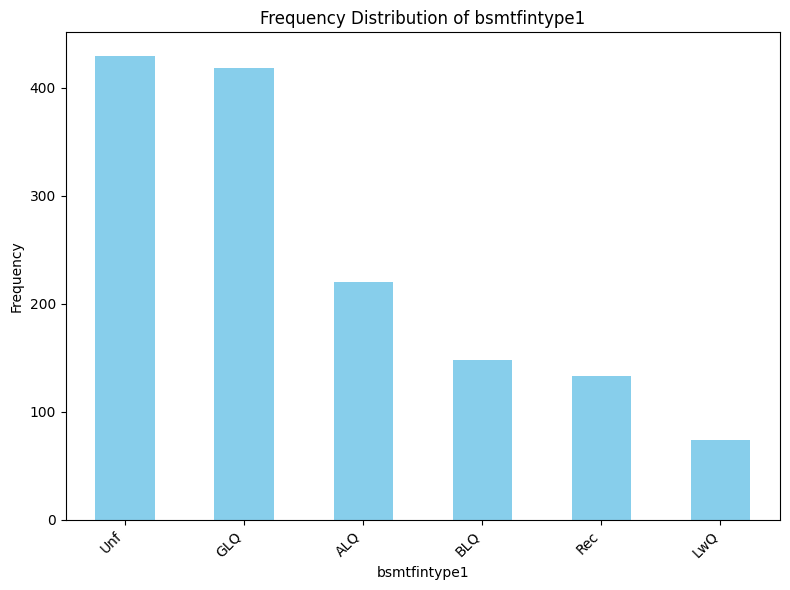

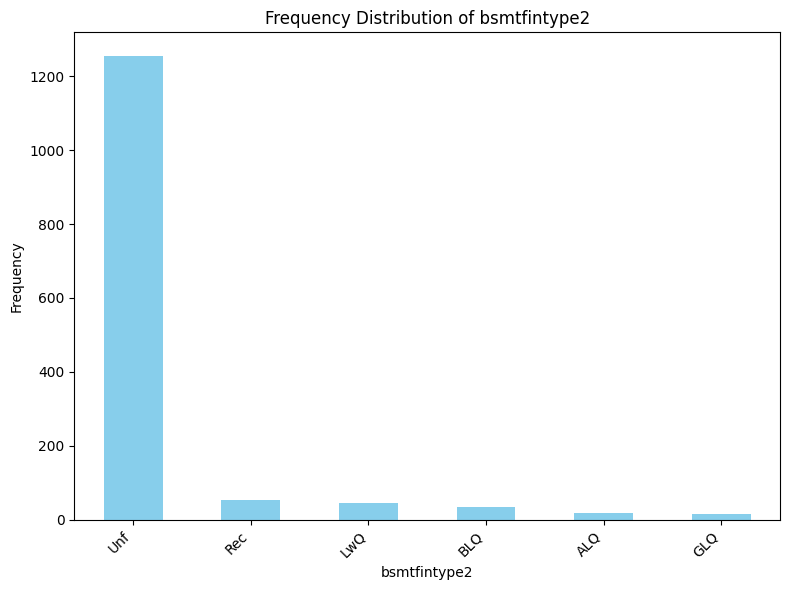

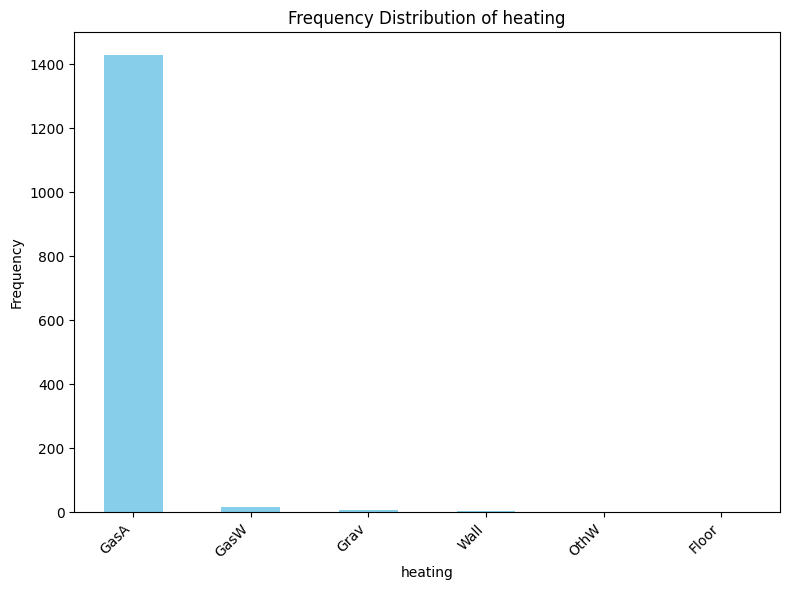

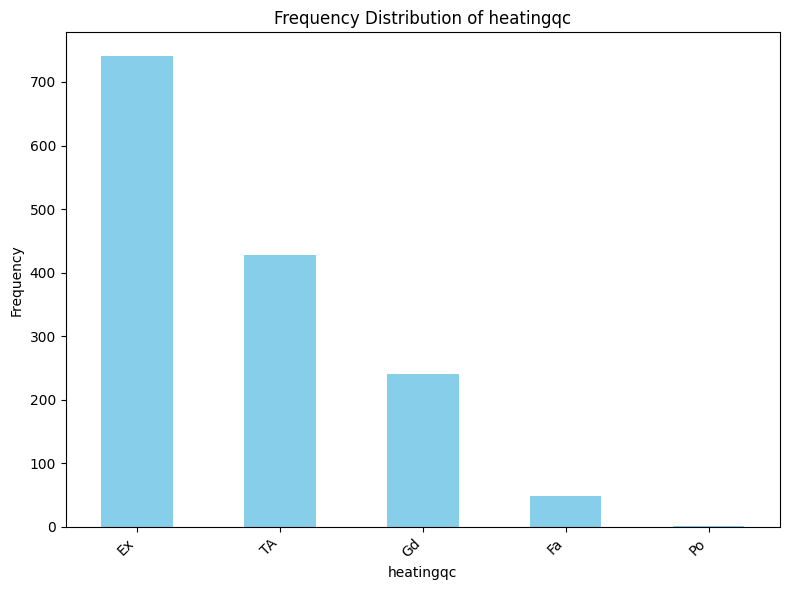

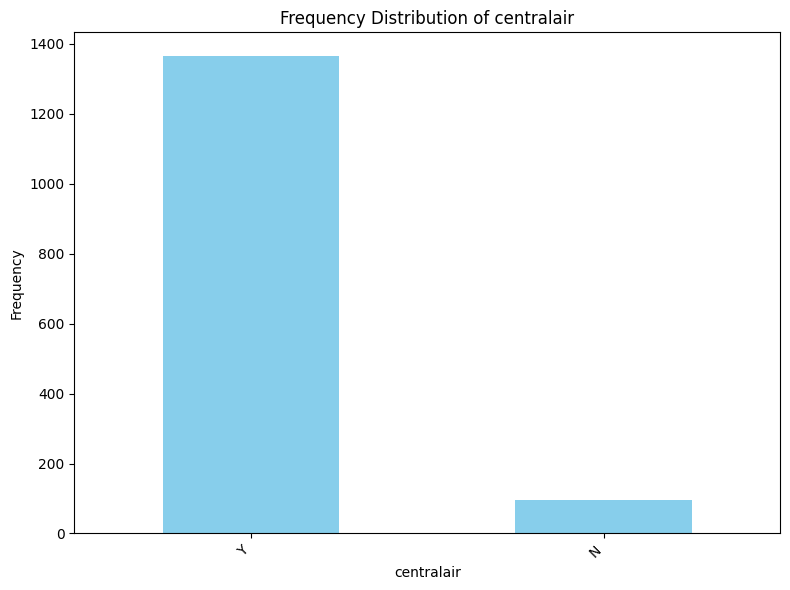

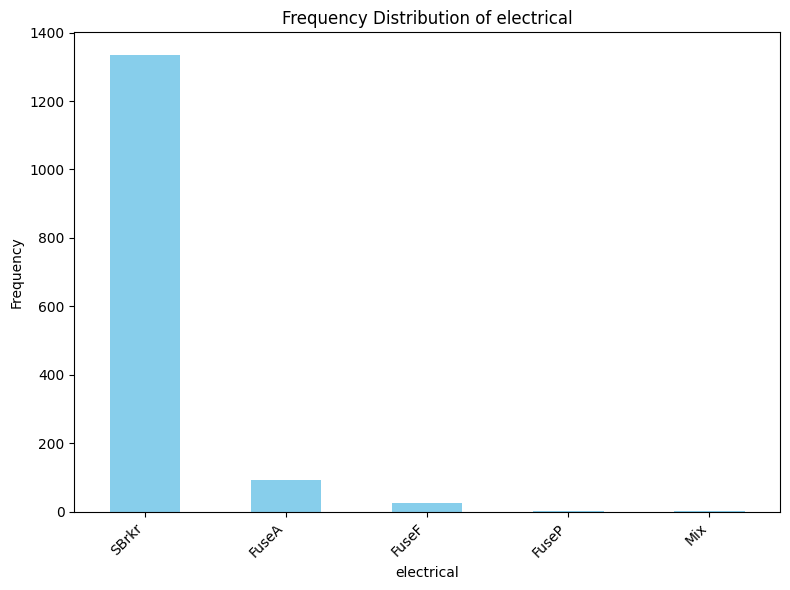

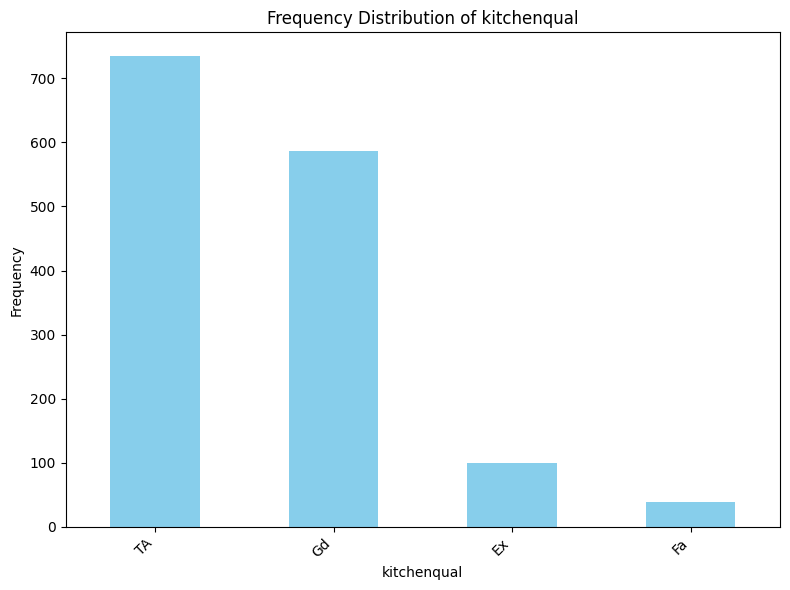

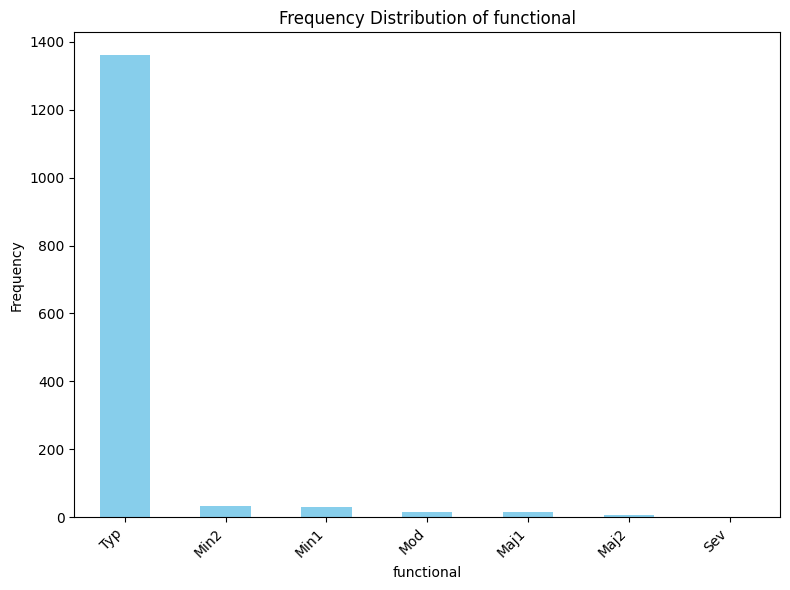

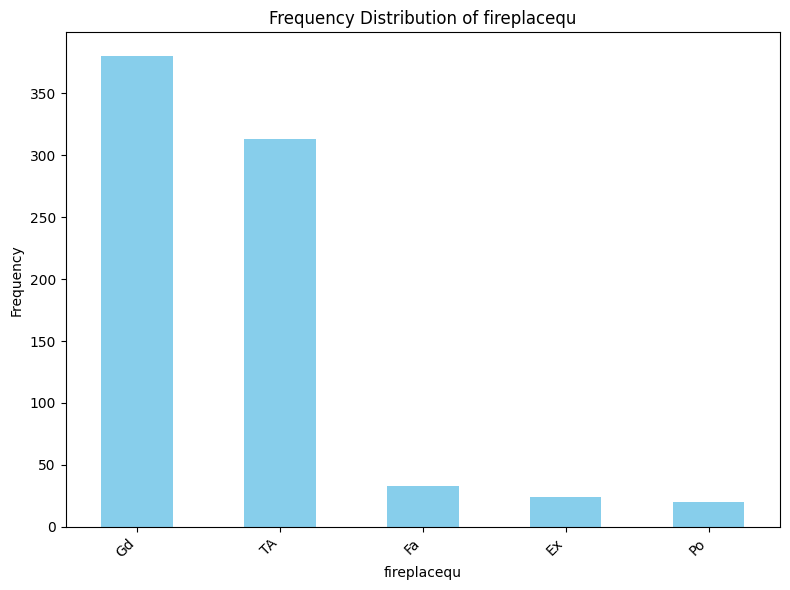

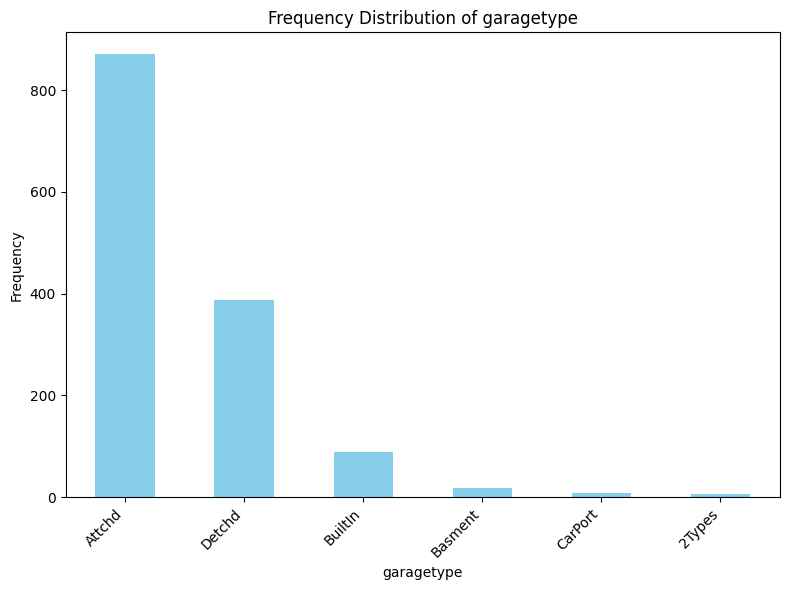

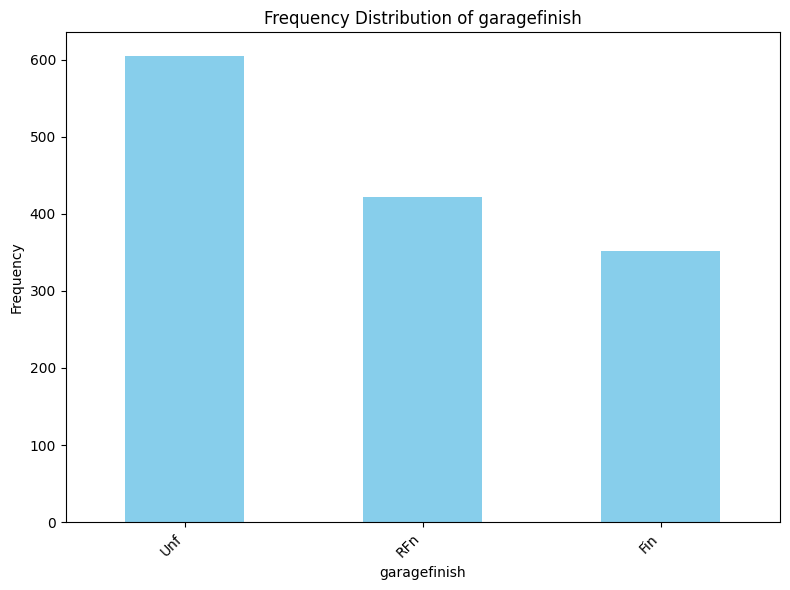

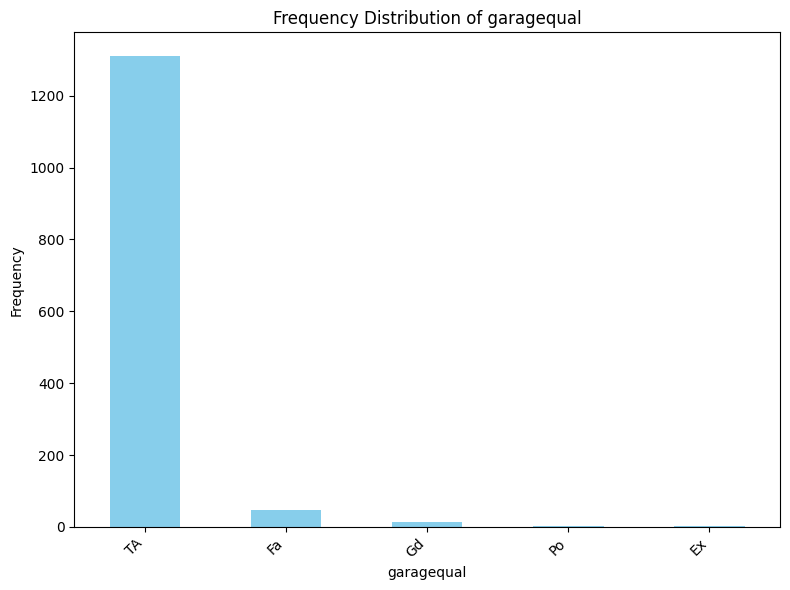

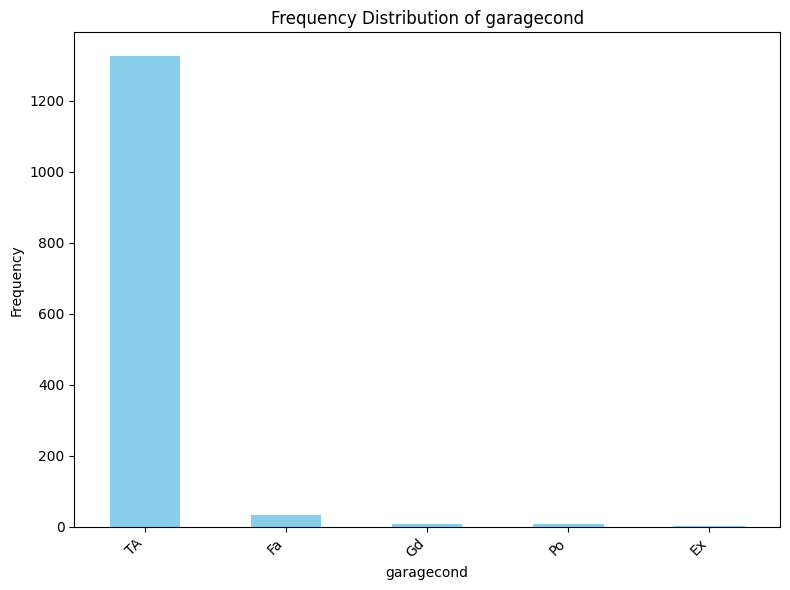

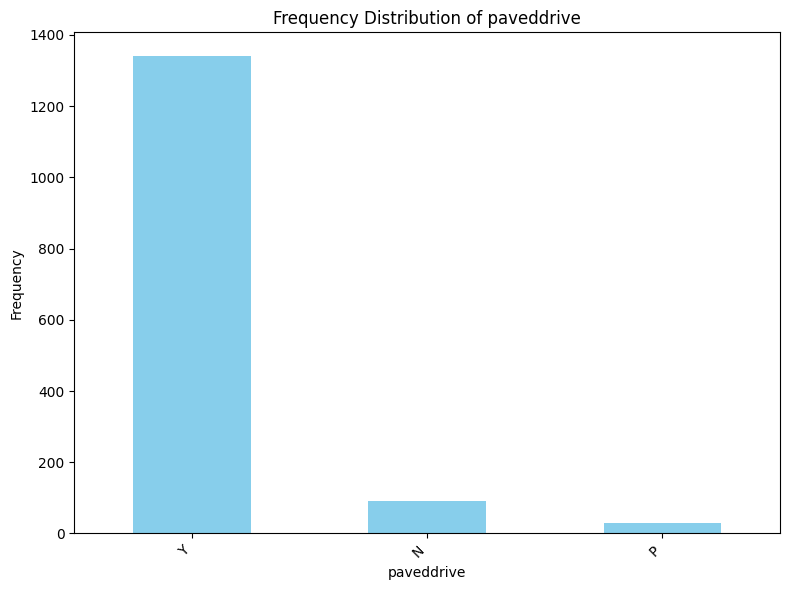

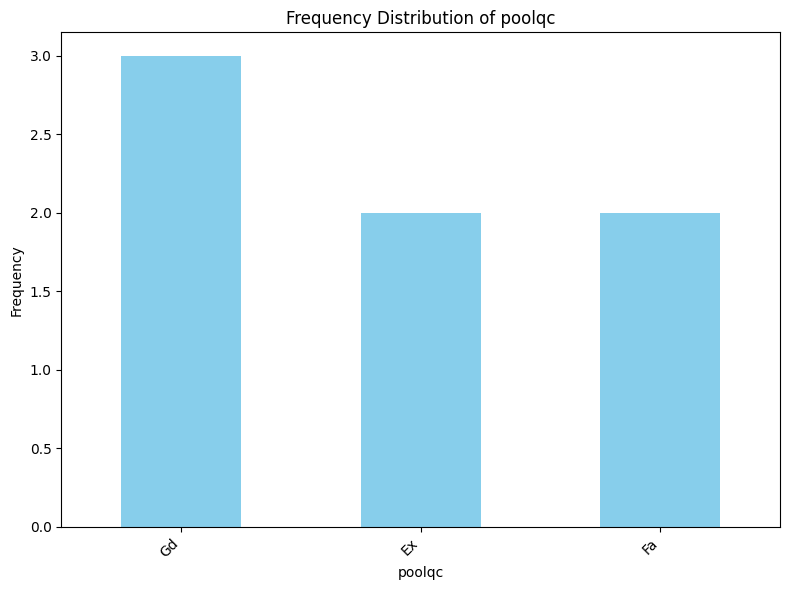

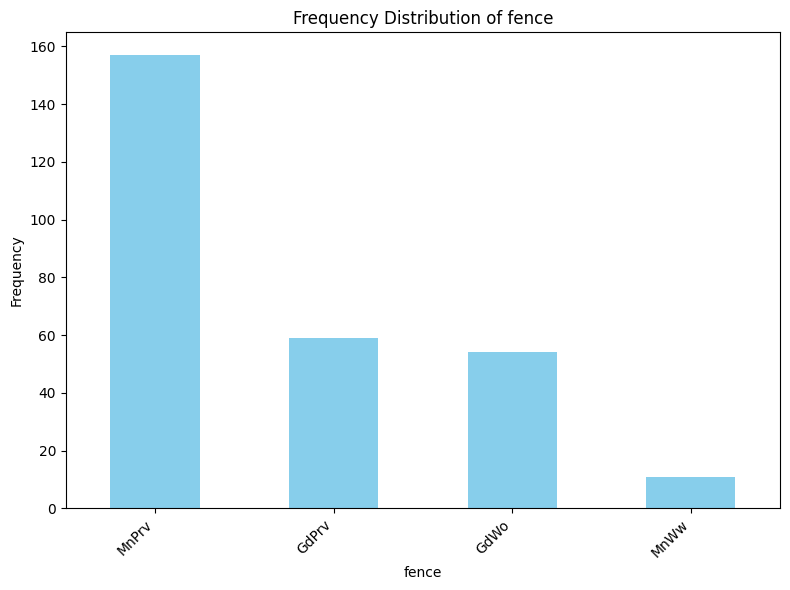

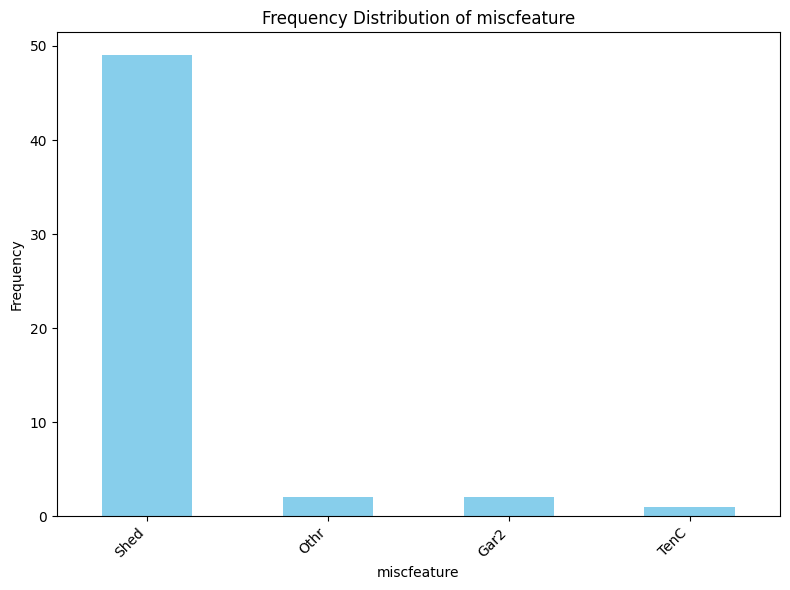

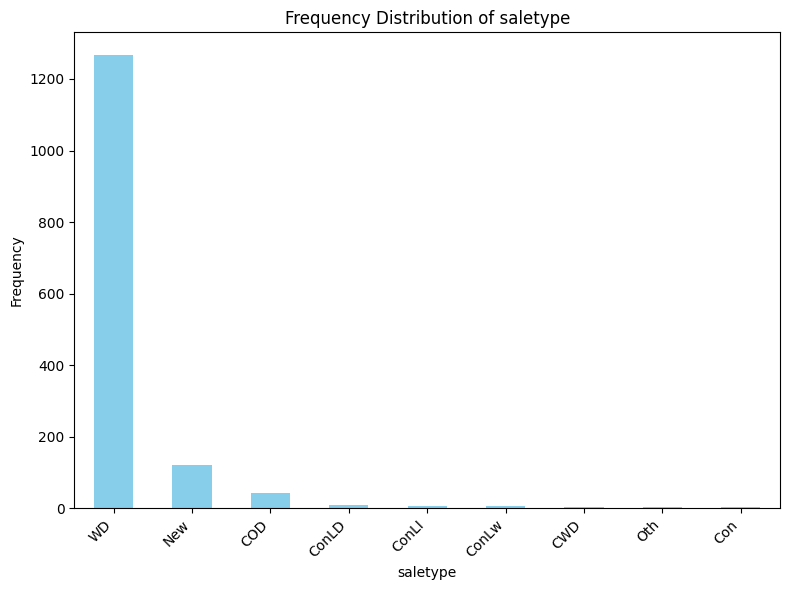

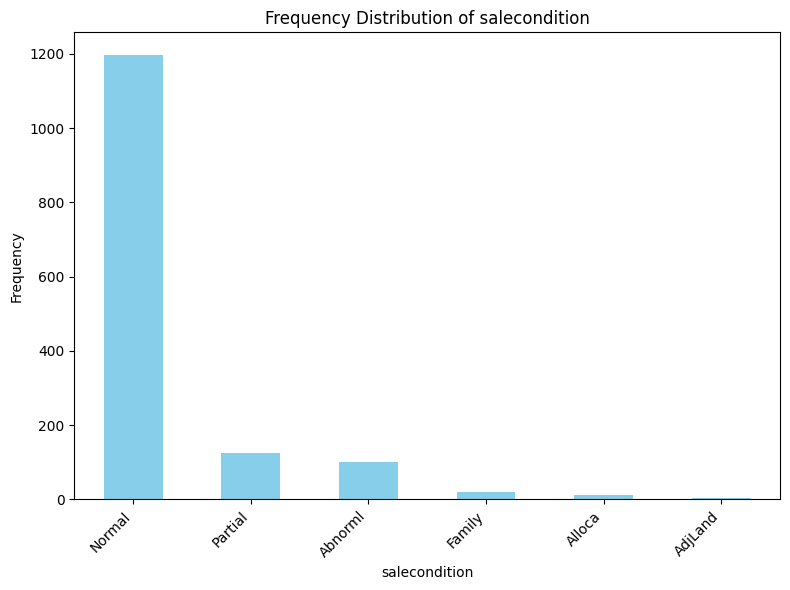

In [8]:

categorical_columns = data.select_dtypes(include=['object'])
for column in categorical_columns.columns:
    plt.figure(figsize=(8, 6))
    data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Detecting missing values**

In [9]:
missing_values = data.isnull().sum()

variables_with_missing_values = missing_values[missing_values > 0]
variables_with_missing_values

frontge_lot      259
alleyname       1369
masvnrtype         8
masvnrarea         8
bsmtqual          37
bsmtcond          37
bsmtexposure      38
bsmtfintype1      37
bsmtfintype2      38
electrical         1
fireplacequ      690
garagetype        81
garageyrblt       81
garagefinish      81
garagequal        81
garagecond        81
poolqc          1453
fence           1179
miscfeature     1406
dtype: int64

,Total,Percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alleyname,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603


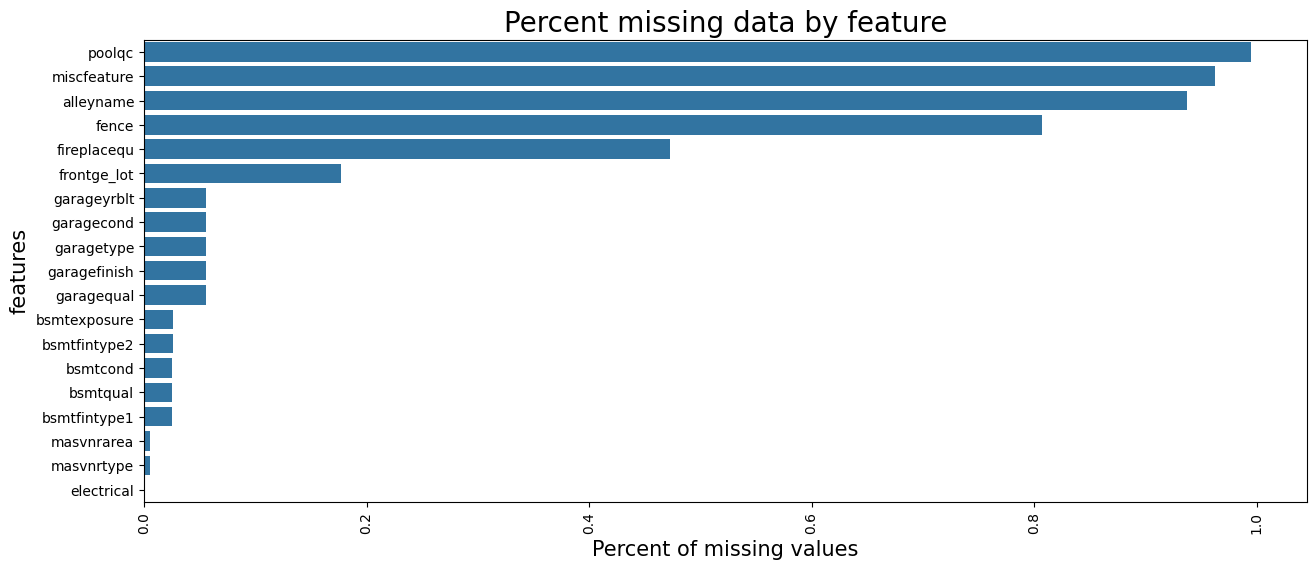

In [10]:
import seaborn as sns
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data=missing_data[missing_data['Percent']>0]
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='vertical')
sns.barplot(y=missing_data.index, x=missing_data['Percent'])
plt.xlabel('Percent of missing values', fontsize=15)
plt.ylabel('features', fontsize=15)
plt.title('Percent missing data by feature', fontsize=20)
missing_data.head()

**Imputing**

In [11]:
columns_to_drop = missing_data[missing_data['Percent'] > .8].index
data.drop(columns_to_drop, axis=1, inplace=True)

In [12]:
a=data[pd.isna(data['fireplacequ'])][['fireplacequ','fireplaces']]
a[a['fireplaces']==0]

,fireplacequ,fireplaces
id,,
1324,NaN,0
218,NaN,0
702,NaN,0
349,NaN,0
221,NaN,0
...,...,...
1062,NaN,0
901,NaN,0
638,NaN,0


le nombre de valeurs manquantes coincide  le fireplaces egale a 0 , ce qui fait c'est une classe ou il y a pas de cheminee.


In [13]:
data['fireplacequ'].fillna('No_fire', inplace=True)

In [14]:
def remplir_frontge_lot(df):
    # Calculer les moyennes de area_lot et frontge_lot pour chaque shape_lot connu
    moyennes = df.groupby('shape_lot').agg({'area_lot': 'mean', 'frontge_lot': 'mean'}).reset_index()

    # Calculer le ratio area_lot/frontge_lot pour les lignes connues (formule generale de la surface : S=d*D)
    moyennes['ratio'] = moyennes['area_lot'] / moyennes['frontge_lot']

    # Remplacer les valeurs manquantes de frontge_lot par la division de area_lot par le ratio
    df['frontge_lot'] = df.apply(lambda row: row['area_lot'] / moyennes.loc[moyennes['shape_lot'] == row['shape_lot'], 'ratio'].values[0] if pd.isnull(row['frontge_lot']) else row['frontge_lot'], axis=1)

    return df

In [ ]:
a__=data[['frontge_lot','area_lot','shape_lot']]
a__=remplir_frontge_lot(a__)

In [16]:
data['frontge_lot']= data['frontge_lot'].fillna(a__['frontge_lot'])

In [17]:
b_=data[pd.isna(data['garagetype'])][['garagecars','garagetype','garagequal','garagecond','garageyrblt','garagefinish']]
b_.shape

(81, 6)

missing values coincide avec le cas ou il y a pas un garage dans la maison

In [18]:
L=['garagetype','garagequal','garagecond','garagefinish']
for col in L :
  data[col].fillna('No_garage', inplace=True)

data['garageyrblt'].fillna(2025, inplace=True)

In [19]:
data[data['bsmtfintype2'].isna()][['bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf']]

,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf
id,,,,,,,,,
372,NaN,NaN,NaN,NaN,0,NaN,0,0,0
1091,NaN,NaN,NaN,NaN,0,NaN,0,0,0
737,NaN,NaN,NaN,NaN,0,NaN,0,0,0
40,NaN,NaN,NaN,NaN,0,NaN,0,0,0
554,NaN,NaN,NaN,NaN,0,NaN,0,0,0
1046,NaN,NaN,NaN,NaN,0,NaN,0,0,0
260,NaN,NaN,NaN,NaN,0,NaN,0,0,0
1036,NaN,NaN,NaN,NaN,0,NaN,0,0,0
1050,NaN,NaN,NaN,NaN,0,NaN,0,0,0


Si le nombre total de surface est nul on remlace la valeur manquante par 'No' cad il existe pas de sous sol


In [20]:
for index, row in data.iterrows():
  for col in ['bsmtfintype1','bsmtqual','bsmtcond','bsmtfintype2']:
    if row['totalbsmtsf'] == 0:
        data.at[index, col] = 'No_bsmt'
data['bsmtexposure'].fillna('No', inplace=True)

In [21]:
data[data['bsmtfintype2'].isna()][['bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf']]

,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf
id,,,,,,,,,
333,Gd,TA,No,GLQ,1124,NaN,479,1603,3206


In [22]:
data[(data['bsmtfintype1']== 'GLQ') & (data['bsmtcond']== 'TA' ) ]['bsmtfintype2'].value_counts()

Unf    372
LwQ      7
Rec      7
ALQ      3
BLQ      2
Name: bsmtfintype2, dtype: int64

In [23]:
data['bsmtfintype2']= data['bsmtfintype2'].fillna('Unf')

In [24]:
c_=data[pd.isna(data['masvnrtype'])][['masvnrtype', 'masvnrarea']]
c_.head()

,masvnrtype,masvnrarea
id,,
937,NaN,NaN
1244,NaN,NaN
978,NaN,NaN
974,NaN,NaN
651,NaN,NaN


In [25]:
data['masvnrarea']= data['masvnrarea'].fillna(0)

In [26]:
data[data['masvnrarea']== 0 ]['masvnrtype'].value_counts()

None       859
Stone        1
BrkFace      1
Name: masvnrtype, dtype: int64

In [27]:
data['masvnrtype']= data['masvnrtype'].fillna('None')


In [28]:
data['electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: electrical, dtype: int64

In [29]:
d_=data[pd.isna(data['electrical'])]
d_

,sub_ms_class,zoning_ms,frontge_lot,area_lot,streetname,shape_lot,contour_land,util,configlot,slopeland,...,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,167500


In [30]:
data['electrical']= data['electrical'].fillna('SBrkr')

Outliers

Je vais utiliser la boîte à moustaches (boxplot) pour repérer les valeurs potentiellement aberrantes, puis je vais examiner chacun de ces cas individuellement pour déterminer le traitement approprié.

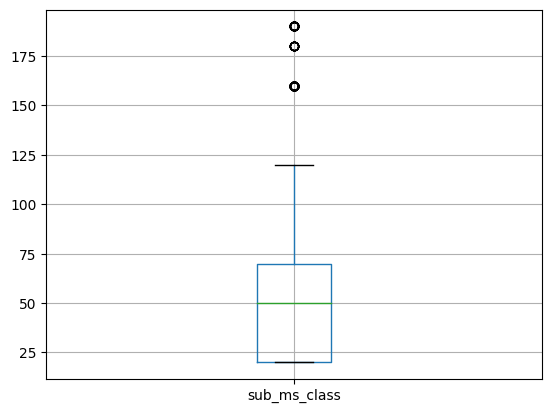

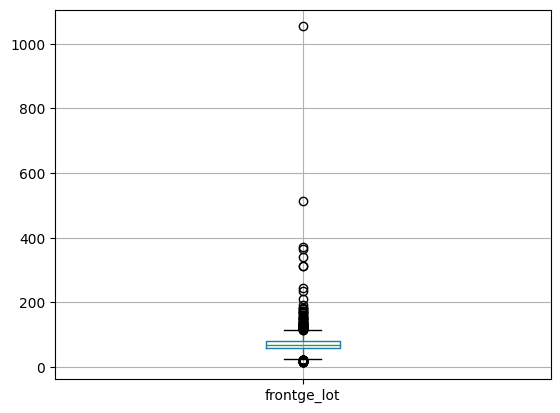

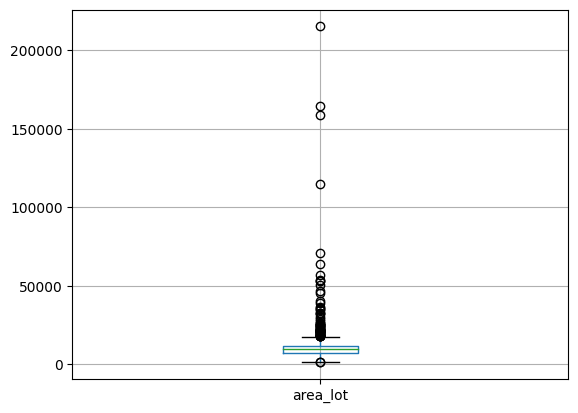

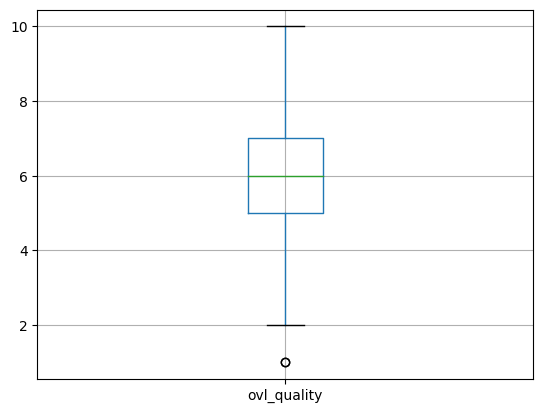

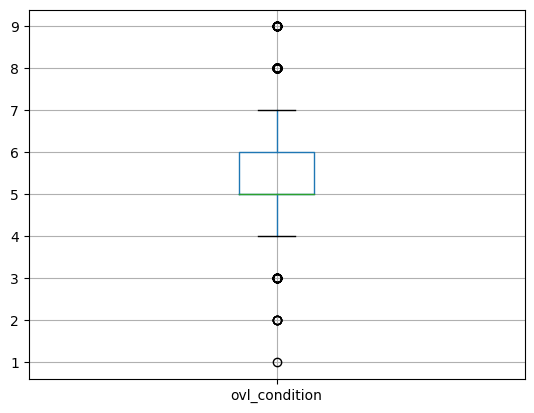

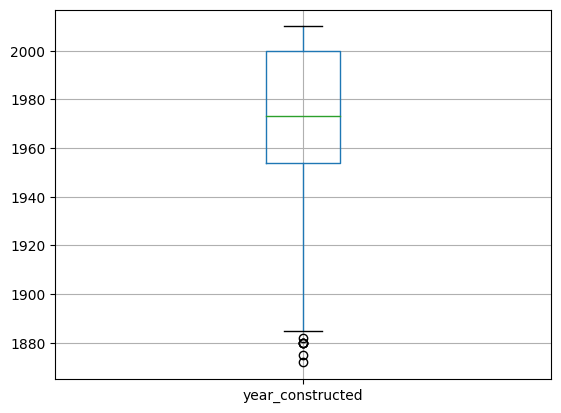

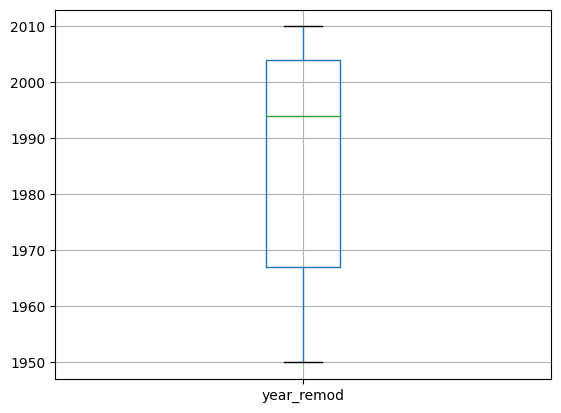

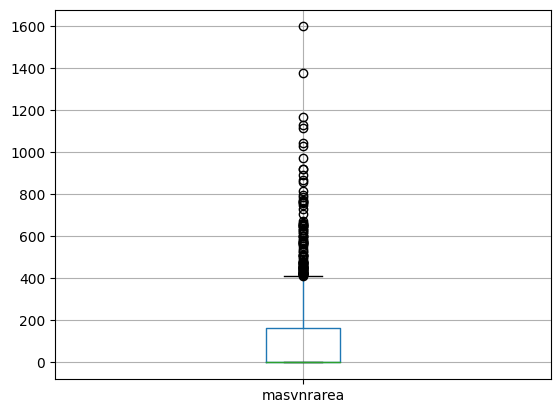

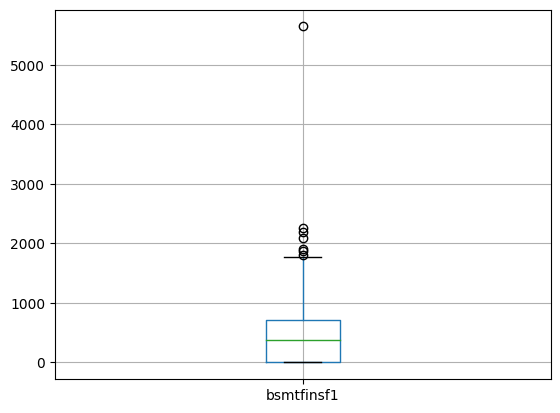

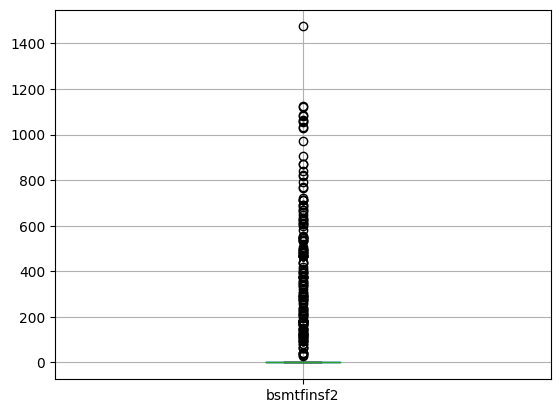

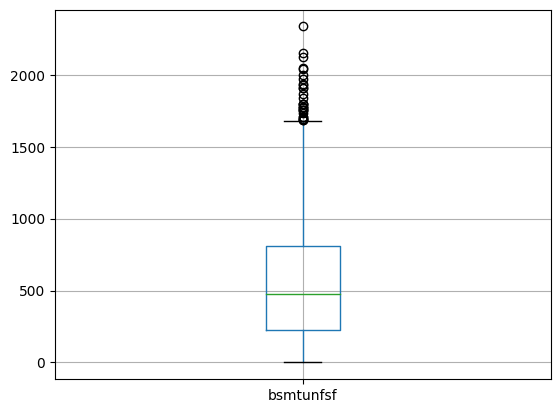

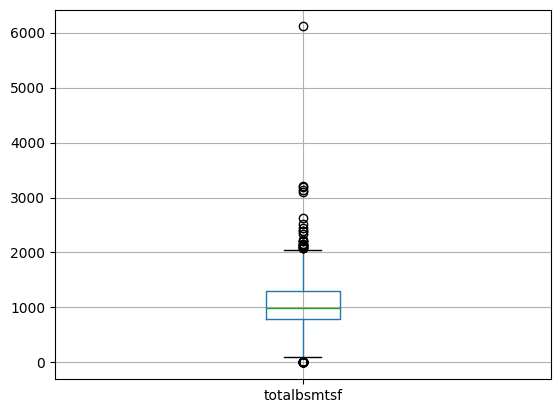

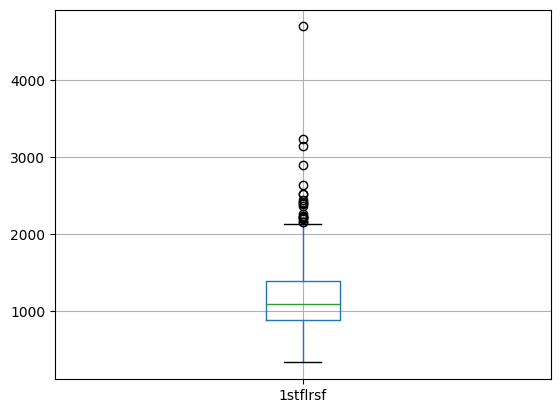

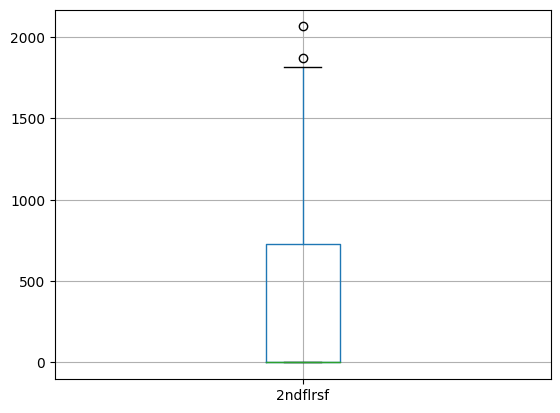

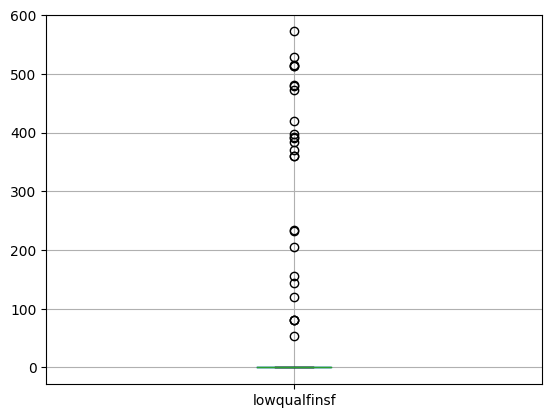

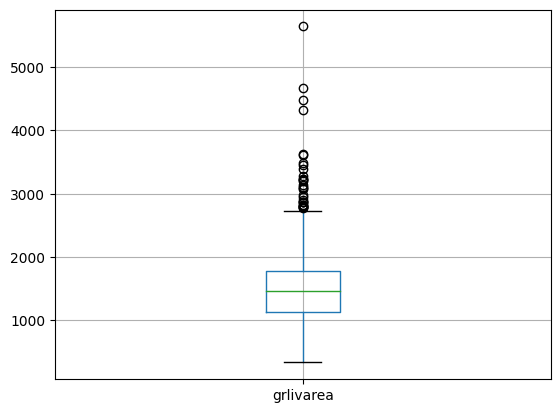

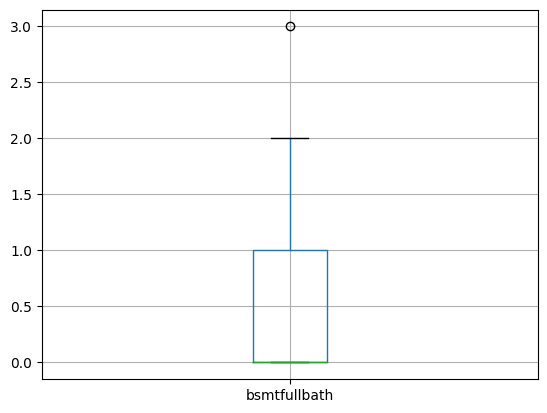

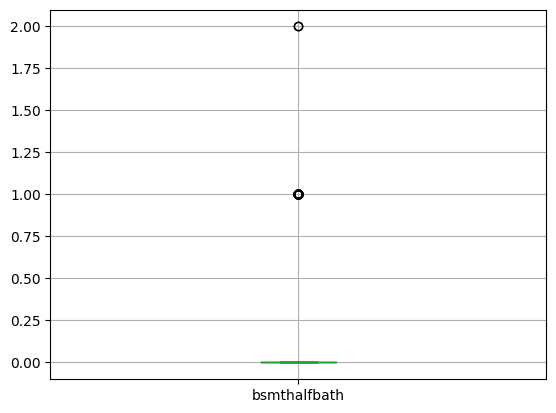

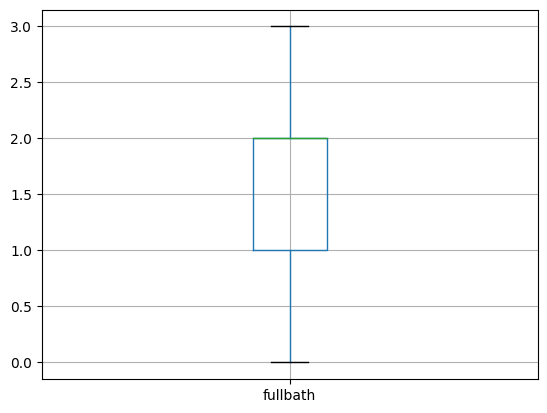

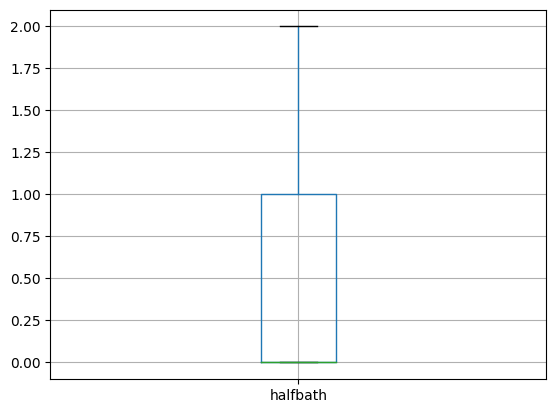

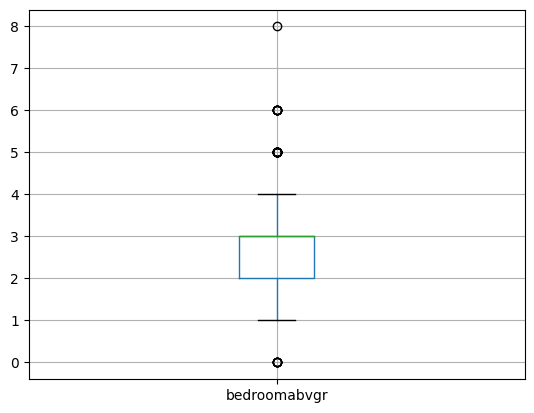

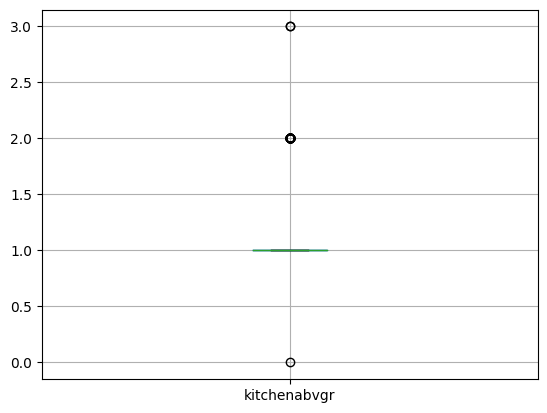

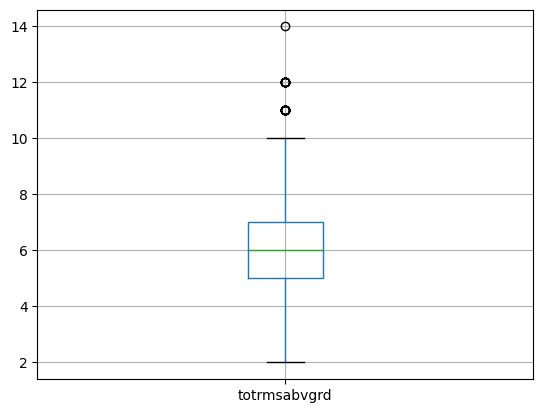

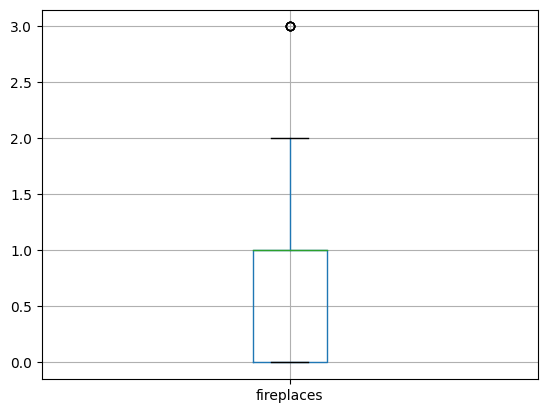

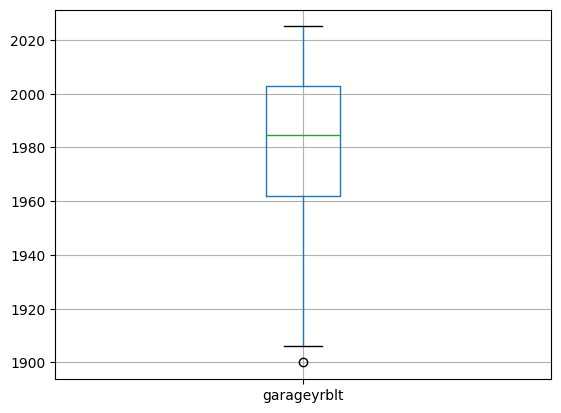

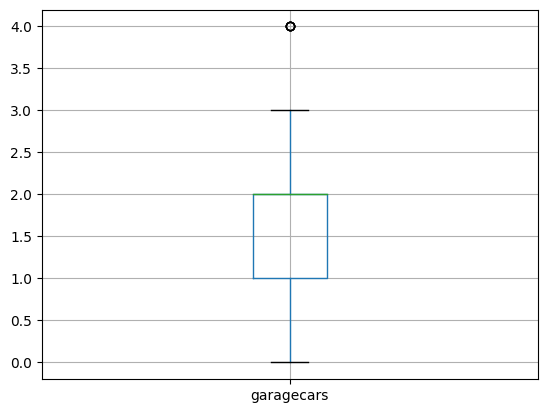

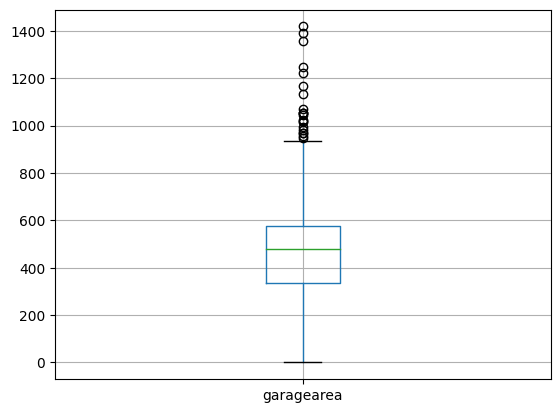

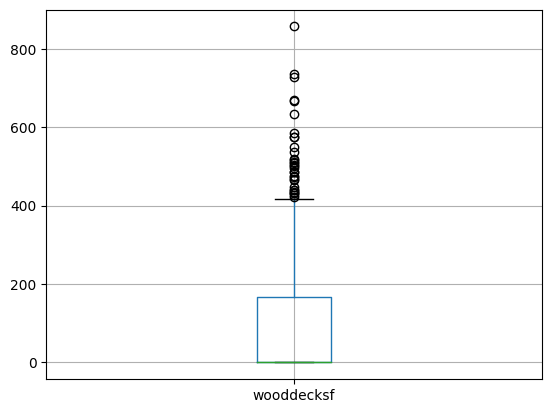

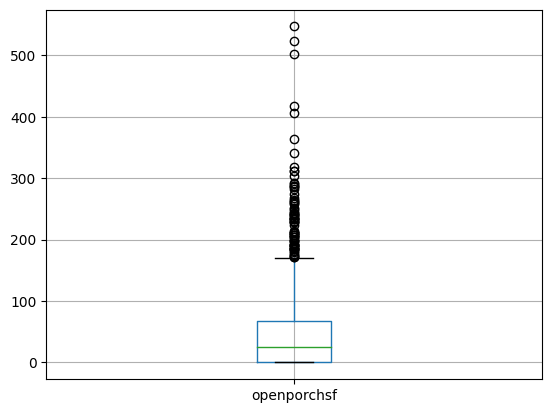

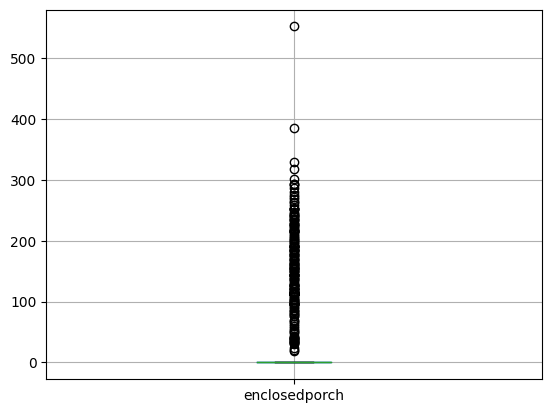

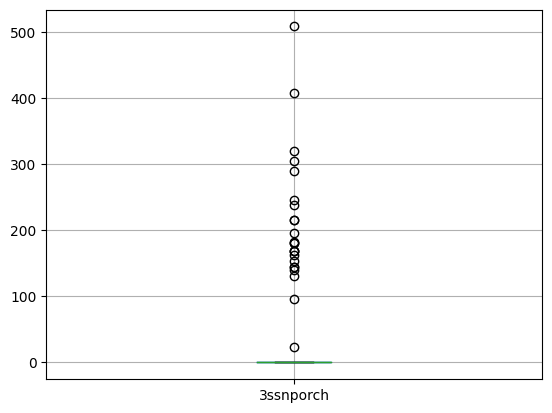

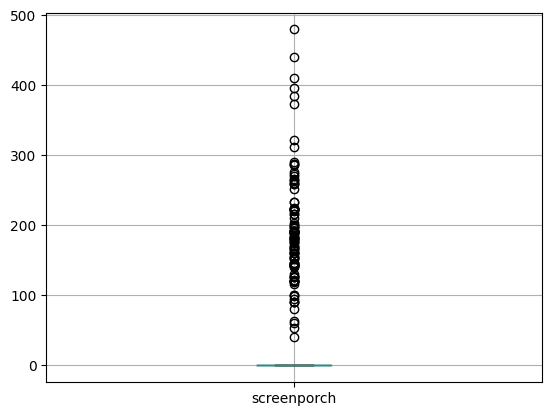

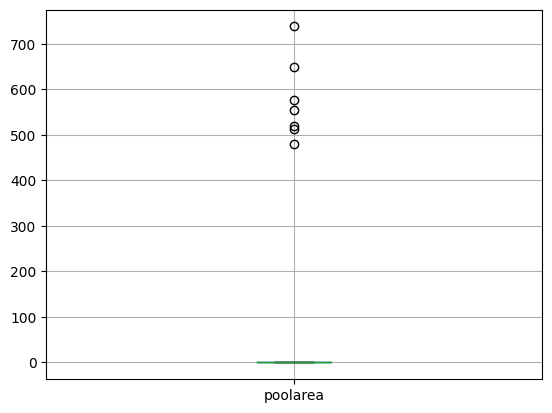

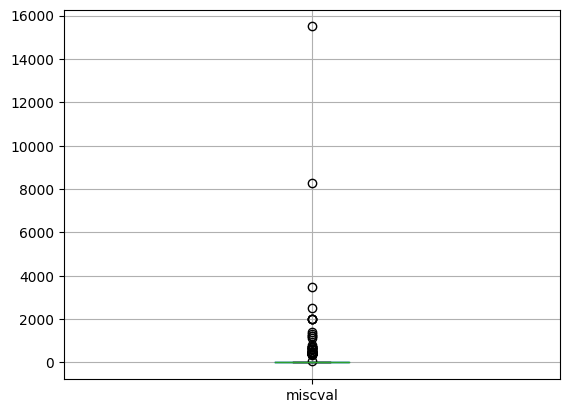

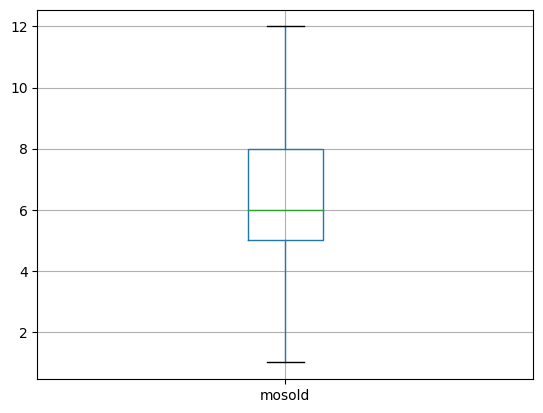

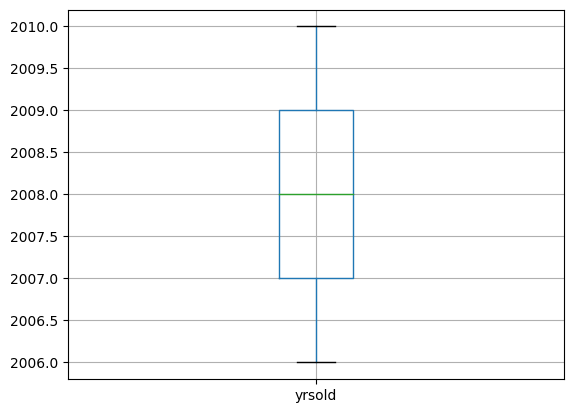

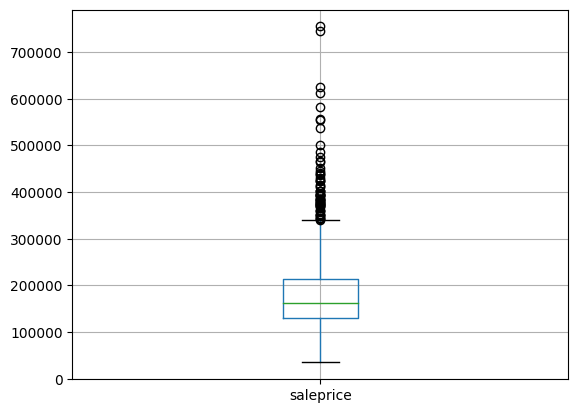

In [31]:
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

for col in numeric_columns:
    data.boxplot(column=col)
    plt.grid(True)
    plt.show()

**Outliers treatment**

Theoriquement les points hors de la boxplot sont considerés des outliers.il est pas acceptable d'éliminer une observation simplement parce qu'elle est une valeur aberrante. Elles peuvent être des observations légitimes et il est important d'investiguer la nature de la valeur aberrante avant de décider de la supprimer ou non. Par exemple on peut trouver un garage qui admet 4 voiture et dans la box plot il est consideré comme outlier.

In [32]:
data.loc[data['frontge_lot'] > 500, 'frontge_lot'] = data.loc[data['frontge_lot'] <= 500, 'frontge_lot'].max()
data.loc[data['bsmtfinsf1'] > 3000, 'bsmtfinsf1'] = data.loc[data['bsmtfinsf1'] <= 3000, 'bsmtfinsf1'].max()
data.loc[data['totalbsmtsf'] > 3000, 'totalbsmtsf'] = data.loc[data['totalbsmtsf'] <= 3000, 'totalbsmtsf'].max()
data.loc[data['1stflrsf'] > 4000, '1stflrsf'] = data.loc[data['1stflrsf'] <= 4000, '1stflrsf'].max()
data.loc[data['miscval'] > 4000, 'miscval'] = data.loc[data['miscval'] <= 4000, 'miscval'].max()

**feature engineering **

In [33]:
categorical_columns = data.select_dtypes(include=['object'])

categorical_columns = categorical_columns.drop('salecondition', axis=1)

numeric_columns = data.select_dtypes(include=['float64', 'int64'])
# Initialiser l'encodage one-hot
data_cat=data[categorical_columns.columns]
# Encodage des variables catégoriques avec one-hot encoding
df_one_hot_encoded = pd.get_dummies(data_cat, columns=categorical_columns.columns)

In [34]:
from sklearn.preprocessing import StandardScaler
data_num=data[numeric_columns.columns]
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(data_num)

In [35]:
scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=numeric_columns.columns)
scaled_df_standard.index=data.index

In [36]:
df_scaled = pd.concat([df_one_hot_encoded, scaled_df_standard], axis=1)
df=pd.concat([df_one_hot_encoded, data_num], axis=1)

On a un mixte de variable  p variable quantitative d variable qualitative pour cela on commencera pas une analyse factorielle de donnees mixtes.

In [ ]:
import prince
famd = prince.FAMD(
    n_components=60,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"
)
famd = famd.fit(df_scaled)

In [39]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,"1,627.176",5.55%,5.55%
1,897.538,3.06%,8.61%
2,727.961,2.48%,11.09%
3,624.037,2.13%,13.22%
4,583.424,1.99%,15.21%
5,504.406,1.72%,16.93%
6,460.317,1.57%,18.50%
7,399.135,1.36%,19.86%
8,386.997,1.32%,21.18%


In [41]:
(
    famd.row_contributions_
    .sort_values(0, ascending=False)
    .head(5)
    .style.format('{:.3%}')
)

component,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
637,0.810%,1.694%,0.027%,0.501%,0.009%,0.028%,0.311%,0.255%,1.325%,0.132%,0.290%,1.018%,0.051%,0.206%,0.260%,0.044%,0.787%,0.173%,0.125%,0.208%,0.006%,2.232%,2.138%,0.487%,0.105%,0.014%,0.744%,0.006%,0.365%,0.743%,0.400%,0.421%,0.079%,0.171%,0.521%,0.413%,0.388%,0.006%,0.001%,0.126%,0.005%,0.222%,0.713%,0.270%,0.352%,0.541%,0.001%,0.671%,0.233%,0.215%,0.248%,1.252%,1.963%,3.645%,0.357%,0.297%,0.411%,0.289%,0.750%,0.023%
706,0.648%,1.224%,2.347%,0.001%,0.062%,0.000%,0.004%,0.040%,0.101%,0.058%,0.092%,0.006%,0.166%,0.102%,1.474%,0.002%,0.051%,0.116%,0.012%,0.072%,0.000%,0.231%,0.092%,0.027%,0.005%,0.424%,0.006%,0.274%,0.013%,0.010%,0.021%,0.604%,0.057%,0.024%,0.003%,0.016%,0.003%,0.150%,0.035%,0.168%,0.071%,0.012%,0.096%,0.415%,0.138%,0.289%,0.241%,0.110%,0.096%,0.029%,0.001%,0.000%,0.391%,0.004%,0.002%,0.003%,0.061%,0.015%,0.025%,0.773%
1338,0.599%,0.665%,0.005%,0.814%,0.002%,0.044%,0.132%,0.039%,0.084%,0.009%,0.682%,0.022%,0.274%,0.124%,0.008%,0.012%,0.160%,0.033%,0.224%,0.420%,0.008%,0.000%,0.432%,0.094%,0.000%,0.005%,0.003%,0.156%,0.026%,0.019%,0.027%,0.036%,0.001%,0.400%,0.292%,0.552%,1.082%,0.006%,0.007%,0.010%,0.001%,0.011%,0.048%,0.008%,0.224%,0.073%,0.007%,0.129%,0.054%,0.015%,0.287%,0.694%,0.043%,0.043%,0.010%,0.034%,0.406%,0.065%,0.290%,0.113%
534,0.587%,1.007%,2.728%,0.108%,0.001%,0.098%,0.002%,0.611%,0.063%,0.015%,0.001%,0.045%,0.014%,0.031%,0.174%,0.000%,0.001%,0.018%,0.108%,0.027%,0.026%,0.259%,0.315%,0.004%,0.089%,0.026%,0.026%,0.831%,0.003%,0.023%,0.012%,0.104%,0.035%,0.074%,0.131%,0.067%,0.267%,0.059%,0.112%,0.109%,0.056%,0.085%,0.087%,0.005%,0.053%,0.089%,0.079%,0.284%,0.001%,0.031%,0.127%,0.182%,0.116%,0.064%,0.006%,0.142%,0.113%,0.003%,0.101%,0.035%
1219,0.571%,0.682%,1.480%,0.069%,0.204%,0.008%,0.013%,0.018%,0.011%,0.022%,0.000%,0.033%,0.064%,0.050%,0.100%,0.002%,0.002%,0.366%,0.330%,0.213%,0.314%,0.702%,0.183%,0.204%,0.000%,0.107%,0.073%,0.129%,0.034%,0.002%,0.065%,0.308%,0.042%,0.178%,0.162%,0.027%,0.011%,0.149%,0.000%,0.127%,0.069%,0.113%,0.342%,0.127%,0.032%,0.122%,0.102%,0.058%,0.034%,0.019%,0.007%,0.080%,0.037%,0.039%,0.002%,0.264%,0.034%,0.014%,0.057%,0.001%


In [42]:
famd_df=famd.row_coordinates(df_scaled)


In [46]:
class_mapping = {
'Normal': 0, 'Family' :1 , 'Partial':2, 'Abnorml':3, 'AdjLand':4, 'Alloca':5
}


data['salecondition'] = data['salecondition'].map(class_mapping)

**Split data for classification**

In [47]:
from sklearn.model_selection import train_test_split

In [48]:

X =famd_df
y=data['salecondition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [49]:
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
xgb_clf = XGBClassifier(n_estimators=200, objective='multi:softmax', learning_rate=0.02,
                        max_depth=6, num_class=6)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.886986301369863
F1 Score: 0.8483467873450748
Confusion Matrix:
[[240   0   1   2   0   0]
 [  6   0   0   1   0   0]
 [  3   0  19   0   0   0]
 [ 15   0   0   0   0   0]
 [  1   0   0   0   0   0]
 [  4   0   0   0   0   0]]


**Fine tuning xgboost **

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from xgboost import XGBClassifier
# Définir la grille des hyperparamètres à optimiser
param_grid = {
'learning_rate': uniform(0.01, 0.3),
'max_depth': randint(3, 10),
'n_estimators': randint(100, 1000),
'subsample': uniform(0.6, 0.4),
'colsample_bytree': uniform(0.6, 0.4),
'gamma': [0, 1, 5]
}
xgb = XGBClassifier()
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=30, scoring='accuracy', cv=2, verbose=2, random_state=42)
random_search.fit(X_train, y_train)
best_xgb = random_search.best_estimator_
best_xgb.fit(X_train, y_train)


Test Accuracy :  89.73%  
 Classification_report 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       243
           1       0.00      0.00      0.00         7
           2       0.95      0.91      0.93        22
           3       0.50      0.07      0.12        15
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4

    accuracy                           0.90       292
   macro avg       0.39      0.33      0.33       292
weighted avg       0.84      0.90      0.86       292

 Confusion_matrix 


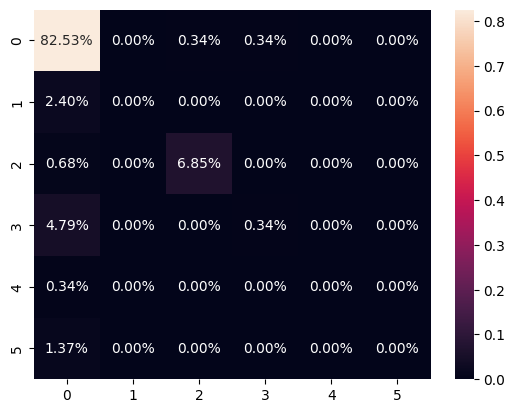

###################- End -###################


In [52]:
import numpy as np
model_=best_xgb
y_pred = model_.predict(X_test)
acc = accuracy_score(y_pred, y_test)

acc = accuracy_score(y_pred, y_test)
print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
print('\033[01m Classification_report \033[0m')
print(classification_report(y_test, y_pred))
print('\033[01m Confusion_matrix \033[0m')
cf_matrix = confusion_matrix(y_test, y_pred)
plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
plt.show()
print('\033[31m###################- End -###################\033[0m')


Prediction de saleprice

In [53]:
categorical_columns = data.select_dtypes(include=['object'])


numeric_columns = data.select_dtypes(include=['float64', 'int64'])

numeric_columns = numeric_columns.drop('saleprice', axis=1)


data_cat=data[categorical_columns.columns]
df_one_hot_encoded = pd.get_dummies(data_cat, columns=categorical_columns.columns)

In [54]:
from sklearn.preprocessing import StandardScaler
data_num=data[numeric_columns.columns]
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(data_num)

In [55]:
scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=numeric_columns.columns)
scaled_df_standard.index=data.index
df_scaled = pd.concat([df_one_hot_encoded, scaled_df_standard], axis=1)

In [ ]:
import prince
famd = prince.FAMD(
    n_components=60,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"
)
famd = famd.fit(df_scaled)

In [57]:
famd_df=famd.row_coordinates(df_scaled)


In [74]:
famd_df.head()

component,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
id,,,,,,,,,,,,,,,,,,,,,
128,79.350721,57.376003,-16.324850,63.541246,27.822206,-11.222772,-16.122512,0.352259,-53.300160,-18.140627,...,-5.232213,1.564517,33.922847,-7.208766,12.038488,-37.081161,-3.459044,17.183010,-9.925409,-0.858859
456,9.198279,-43.203921,1.543945,-1.116145,14.032523,15.028572,-22.449264,-10.618850,25.241431,-8.065685,...,-5.146987,-9.756765,-5.376567,3.598923,-3.199523,-1.712735,-0.357745,10.190136,4.129286,-12.111095
1324,47.734578,53.868220,14.795224,74.352355,42.038140,7.901003,-17.033307,41.946547,-6.848857,4.086712,...,9.372627,-12.053109,9.455991,31.787320,-4.444994,-5.635514,5.522489,-18.460313,-22.831939,-3.773392
218,49.820119,11.126557,-27.590081,-27.084756,-8.271237,1.523320,17.401384,-4.179855,8.735558,-3.567128,...,0.027944,0.736181,7.189535,-1.862423,-11.364538,9.943100,-1.143762,3.431333,6.537220,-8.564335
1182,-51.227217,29.824519,9.330515,47.621135,-50.047043,83.931192,54.764687,9.793469,10.817675,-17.269639,...,10.311297,-6.433576,11.903272,4.941617,-7.201513,-8.159421,8.942715,-6.072204,-0.637715,-9.376511


In [ ]:
X =famd_df
y=data['saleprice']
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
rf_regressor = RandomForestRegressor()

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': randint(10, 1000),
    'max_features': ['auto', 'sqrt'],
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_grid, n_iter=100,
                                   cv=2, random_state=42, n_jobs=-1)
random_search.fit(X, y)
print("Best hyperparameters found:")
print(random_search.best_params_)
# Get the best model
best_rf_model = random_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best hyperparameters found:
{'bootstrap': True, 'max_depth': 13, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 807}


In [68]:
y_pred= best_rf_model.predict(X_test)

In [75]:
# Calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

mape_value = mape(y_test, y_pred)
rmse_value = rmse(y_test, y_pred)

print("MAPE:", mape_value,'%')
print("RMSE:", rmse_value)

MAPE: 8.725326073461899 %
RMSE: 22611.24084688005


In [70]:
rmse_value/y_test.mean()

0.12851365001171322

In [77]:
y.mean()

180921.19589041095

In [78]:
rmse_value/y.mean()

0.12497839590103259

In [84]:
def compare_predictions(y_pred, y_test):
    above_count = 0
    below_count = 0
    exact=0
    for pred, actual in zip(y_pred, y_test):
        if abs((pred-actual)/actual)<=0.01:
            exact+=1
        elif pred > actual:
            above_count += 1
        elif pred < actual:
            below_count += 1

    return above_count, below_count,exact

def plot_predictions(y_pred, y_test):
    above_count, below_count,exact = compare_predictions(y_pred, y_test)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values\nAbove: {} / Below: {}/ exact: {}'.format(above_count, below_count,exact))
    plt.grid(True)
    plt.show()

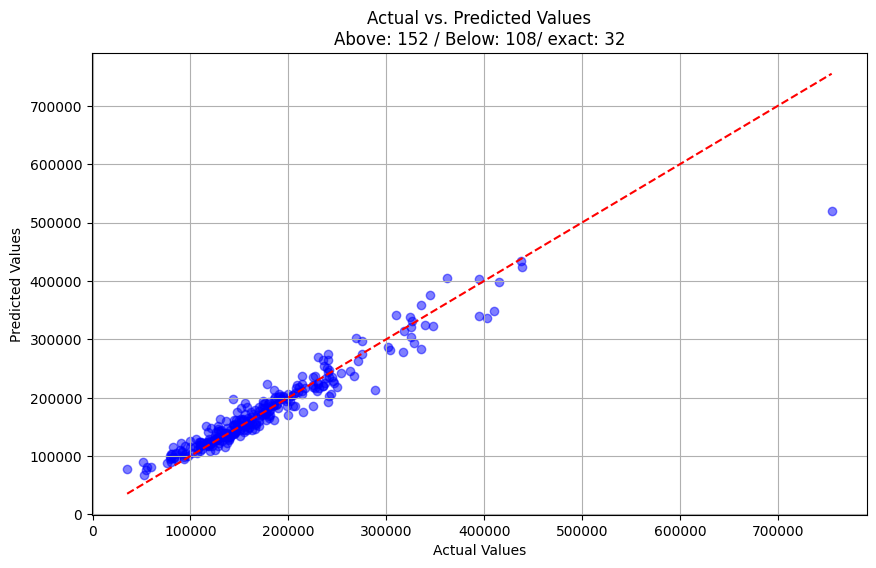

In [85]:
plot_predictions(y_pred,y_test)